# 회귀(Regression) 예측
- 수치형 값을 예측(y의 값이 연속된 수치로 표현)
- 예시) 주택 가격 예측, 매출액 예측

In [94]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

import warnings 
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston

In [95]:
# 데이터 로드
data = load_boston()
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- data['data']에는 X데이터
- data['feature_names']에는 컬럼명

In [96]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

- Y데이터인 price도 데이터프레임에 추가

In [97]:
df['MEDV']=data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**컬럼 소개** (속성 수 :13)
- **features(속성)**
    - CRIM:범죄율
    - ZN : 25,000평방 피트 당 주거용 토지 비율
    - INDUS : 비소매(no-retail)비즈니스 면적 비율
    - CHAS : 찰스강 더미변수(1=통로가 하천을 향함, 0=그렇지 않음)
    - NOX : 산화질소농도
    - RM : 주거당 평균 객실수
    - AGE : 1940년 이전에 건축된 자가 소유 점유 비율
    - DIS : 5개의 보스턴 고용센터까지의 가중거리
    - RAD : 고속도로 접근성 지수
    - TAX : 10,000달러 당 전체 가치 재산 세율
    - PTRATIO : 도시 별 학생-교사 비율
    - B : 1000(Bk-0.63)^2 (Bk : 도시 별 검정 비율)
    - LSTAT : 인구의 낮은 지위
    

- **Label**
    - MEDV : 자가 주택의 중앙값(1,000 달러 단위)

# train/test 데이터를 분할

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV',1), df['MEDV'])

In [100]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [101]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42
482,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01
91,0.03932,0.0,3.41,0.0,0.489,6.405,73.9,3.0921,2.0,270.0,17.8,393.55,8.20
459,6.80117,0.0,18.10,0.0,0.713,6.081,84.4,2.7175,24.0,666.0,20.2,396.90,14.70
123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41


In [102]:
y_train.head()

100    27.5
482    25.0
91     22.0
459    20.0
123    17.3
Name: MEDV, dtype: float64

# 평가지표 만들기

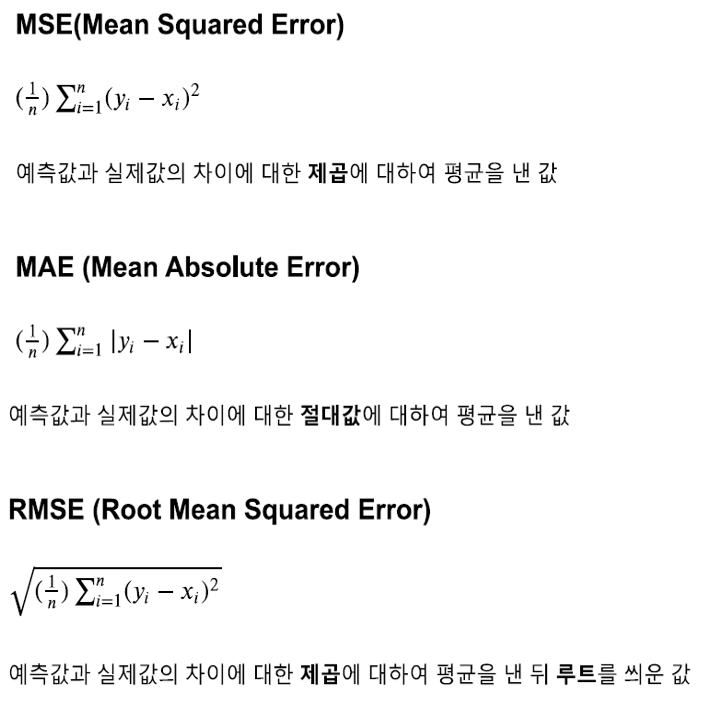

# 평가지표 만들기
# (1) MSE

In [103]:
import numpy as np
pred = np.array([3,4,5])
actual = np.array([1,2,3])

def my_mse(pred,actual):
    return((pred-actual)*2).mean()

my_mse(pred, actual)

4.0

# (2) MAE

In [104]:
def my_mae(pred,actual):
    return np.abs(pred-actual).mean()

my_mae(pred, actual)

2.0

# (3) RMSE

In [105]:
def my_rmse(pred,actual):
    return np.sqrt(my_mse(pred,actual))

my_rmse(pred, actual)

2.0

# sklearn의 평가지표 활용하기

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
my_mae(pred, actual), mean_absolute_error(pred,actual)

(2.0, 2.0)

In [107]:
my_mse(pred,actual), mean_squared_error(pred, actual)

(4.0, 4.0)

# 모델별 성능 확인 함수

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

# LinearRegression

In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)

### n_jobs: CPU코어의 사용

In [110]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

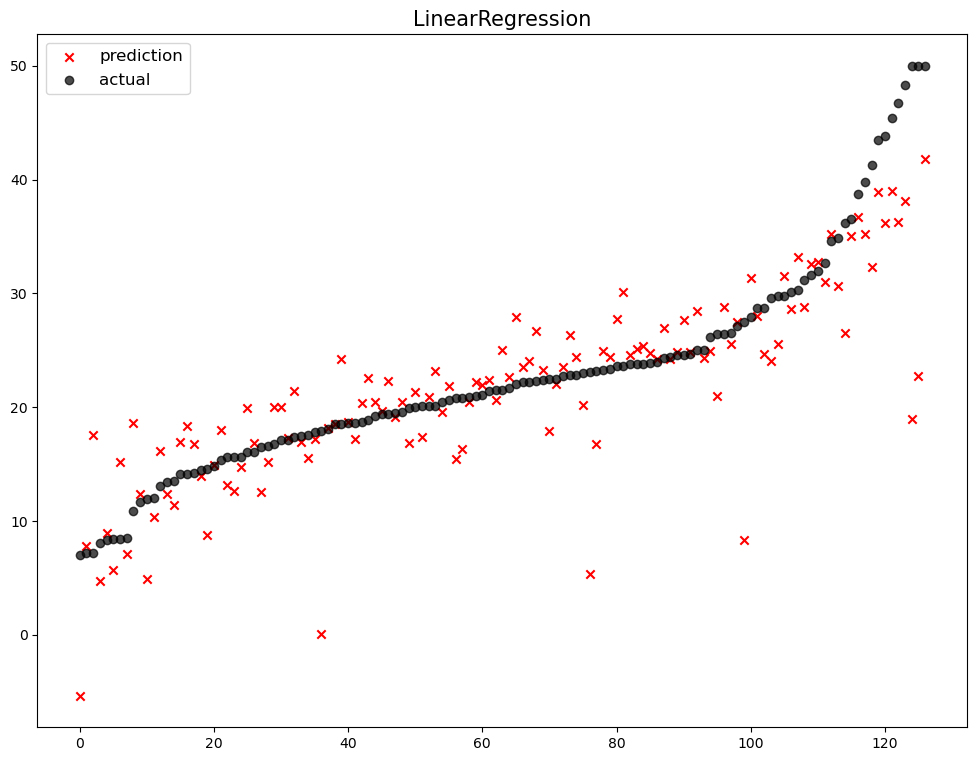

              model        mse
0  LinearRegression  35.312171


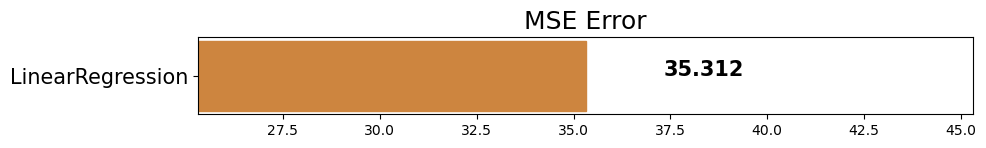

In [41]:
pred = model.predict(x_test)
mse_eval('LinearRegression',pred, y_test)

# 규제(Regulariztion)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

#### L2 규제(L2 Regularization) = Reidge
- 각 가중치 제곱의 합에 규제 강도(Regularization Strength)를 곱함
- 규제강도를 크게하면 가중치가 더 많이 감소되고(규제 중시), 작게하면 가중치 증가(규제 중시X)
- Error = MSE + aw^2

#### L1 규제(L1 Regularization) = Lasso
- 가중치의 제곱의 합이 아닌 가중치의 합을 더한 값에 규제강도를 곱하여 오차에 도함
- 어떤 가중치(w)는 실제로 0이 됨.(즉, 모델에서 완전히 제외되는 특성이 생김)
- L2규제가 L1규제에 비해 더 안정적이라 일반적으로 L2규제를 더 많이 사용
- Error = MSE + a|w|

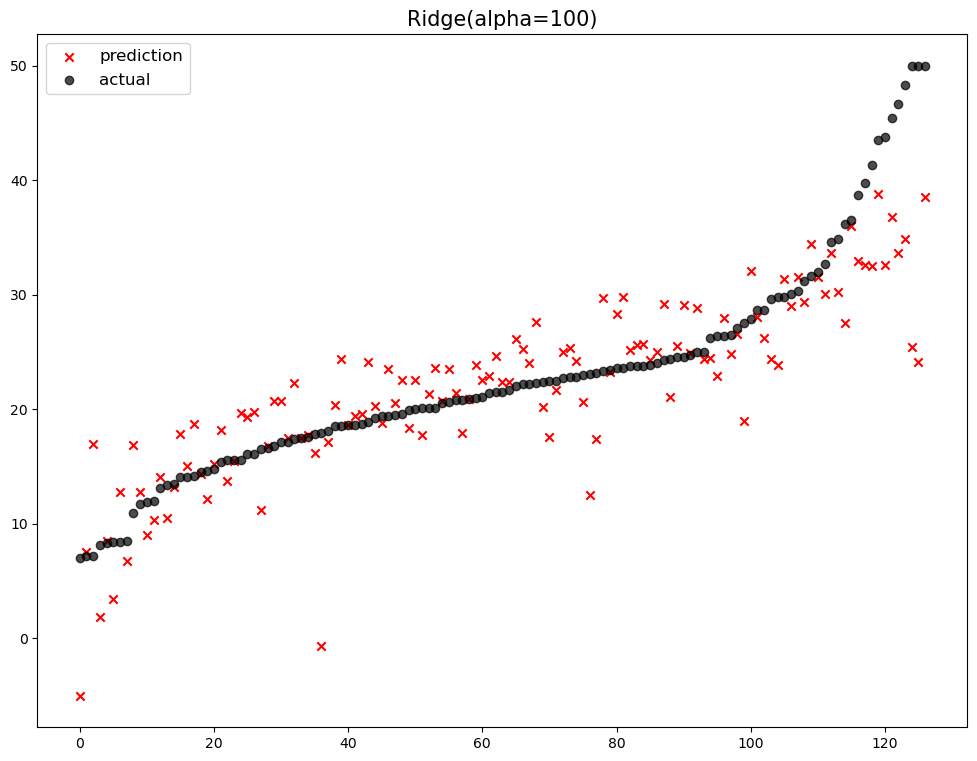

              model        mse
0  LinearRegression  35.312171
1  Ridge(alpha=100)  31.088206


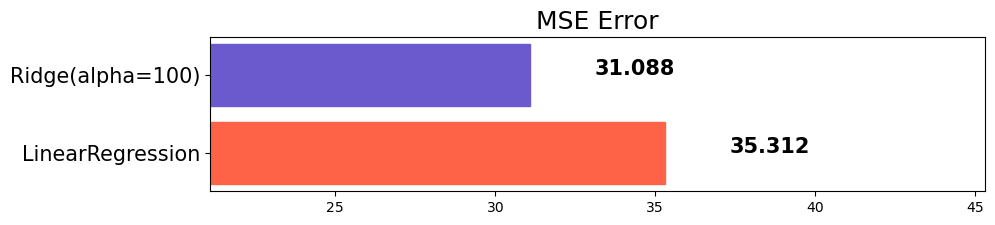

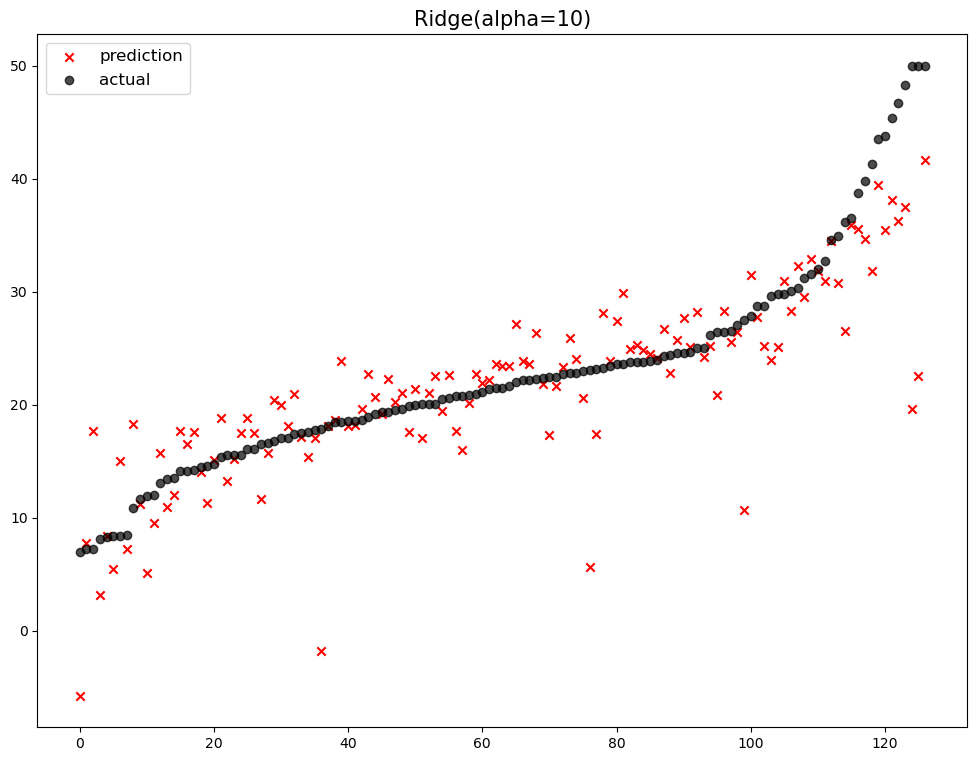

              model        mse
0  LinearRegression  35.312171
1   Ridge(alpha=10)  34.998585
2  Ridge(alpha=100)  31.088206


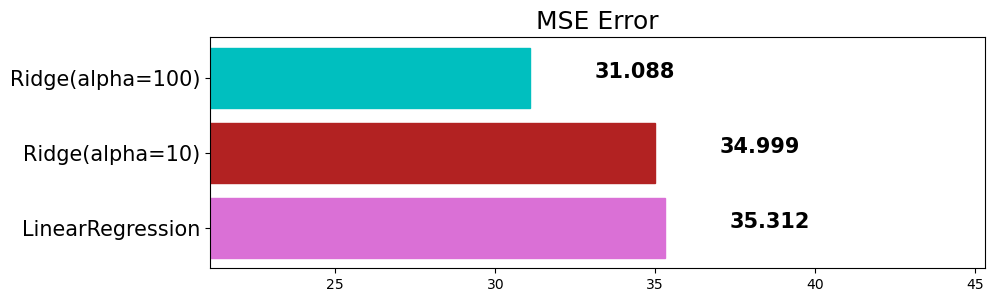

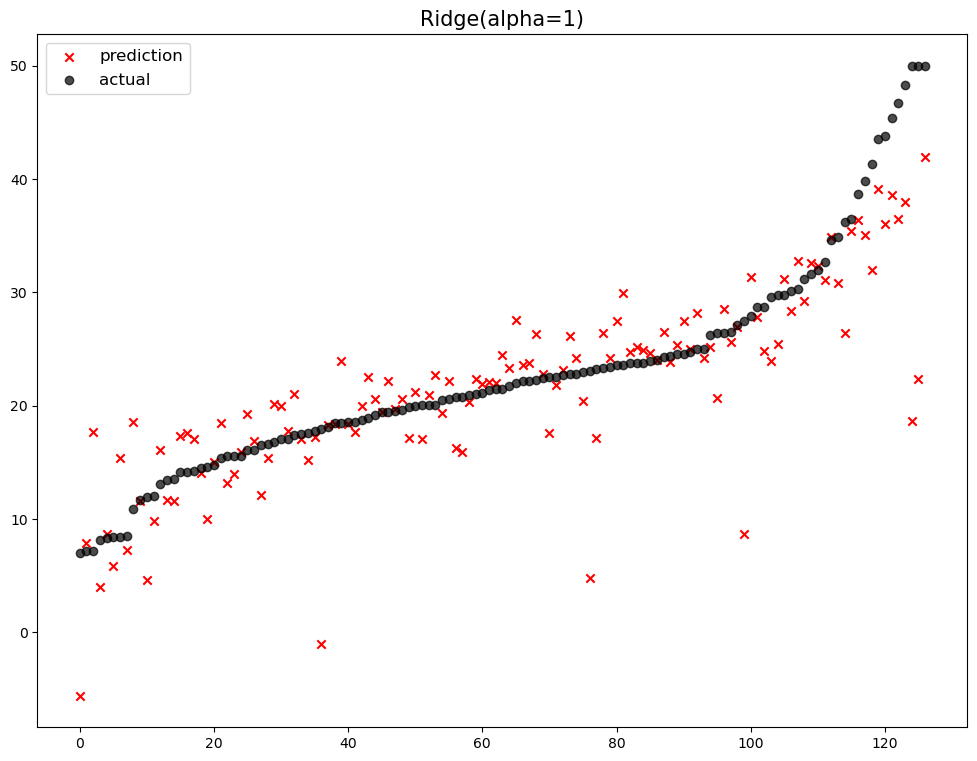

              model        mse
0    Ridge(alpha=1)  35.842039
1  LinearRegression  35.312171
2   Ridge(alpha=10)  34.998585
3  Ridge(alpha=100)  31.088206


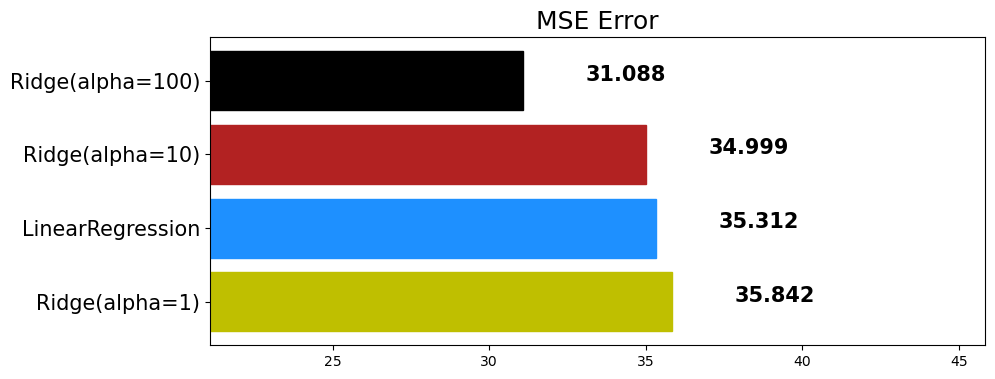

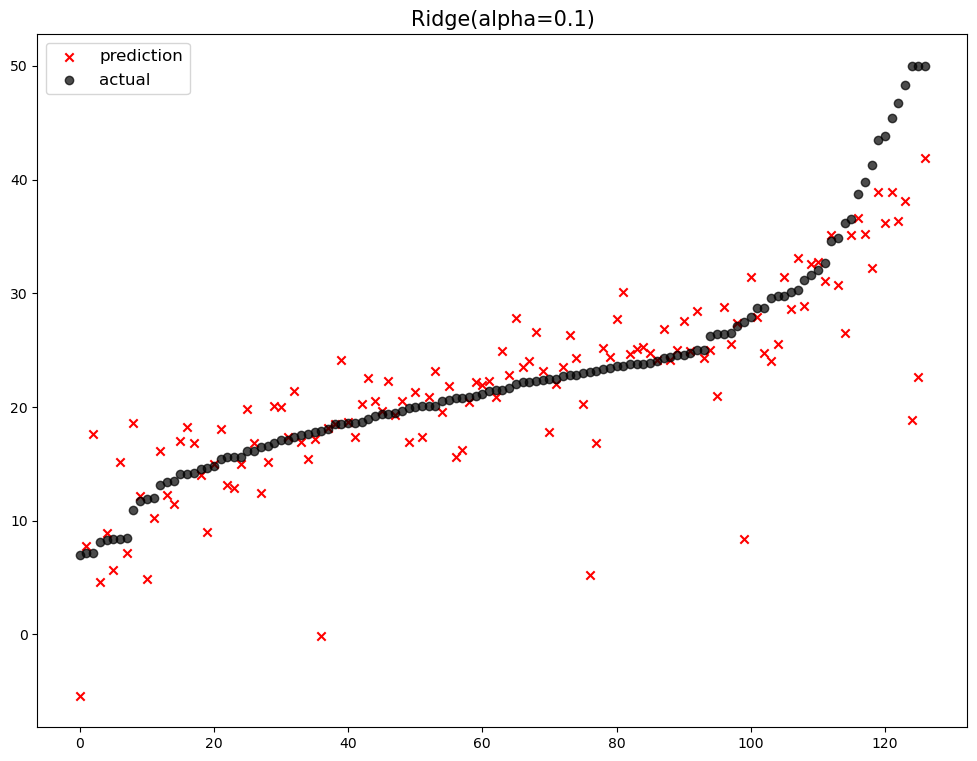

              model        mse
0    Ridge(alpha=1)  35.842039
1  Ridge(alpha=0.1)  35.396890
2  LinearRegression  35.312171
3   Ridge(alpha=10)  34.998585
4  Ridge(alpha=100)  31.088206


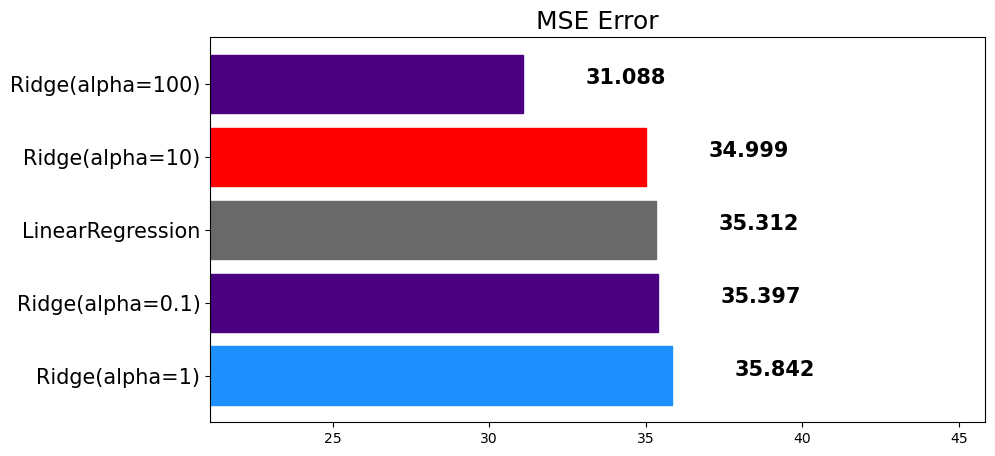

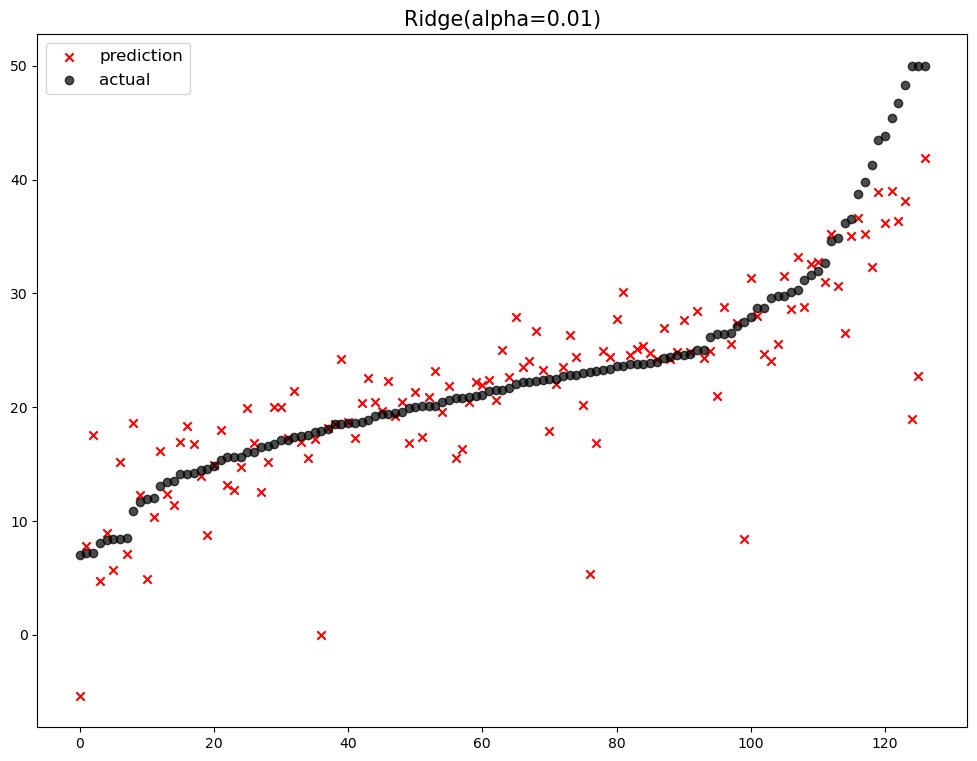

               model        mse
0     Ridge(alpha=1)  35.842039
1   Ridge(alpha=0.1)  35.396890
2  Ridge(alpha=0.01)  35.320994
3   LinearRegression  35.312171
4    Ridge(alpha=10)  34.998585
5   Ridge(alpha=100)  31.088206


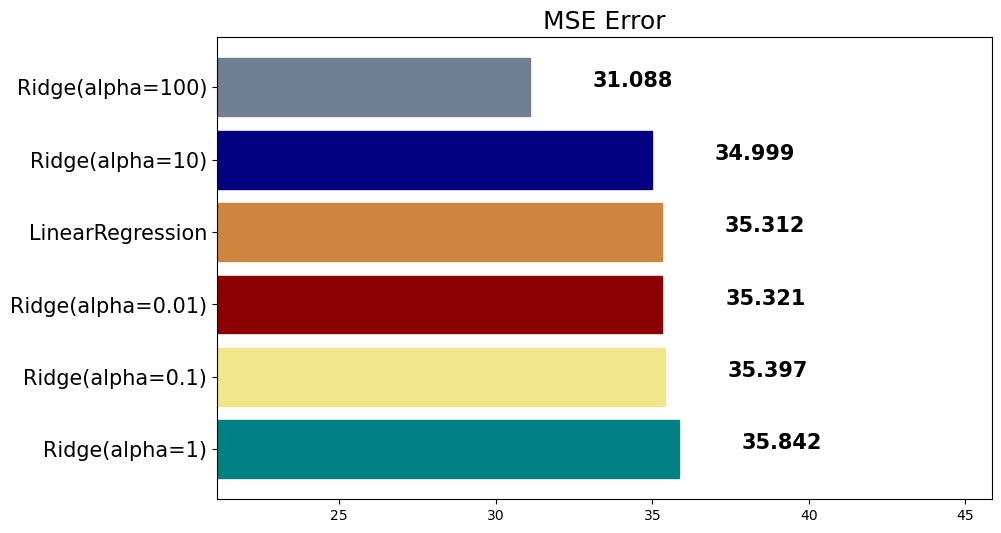

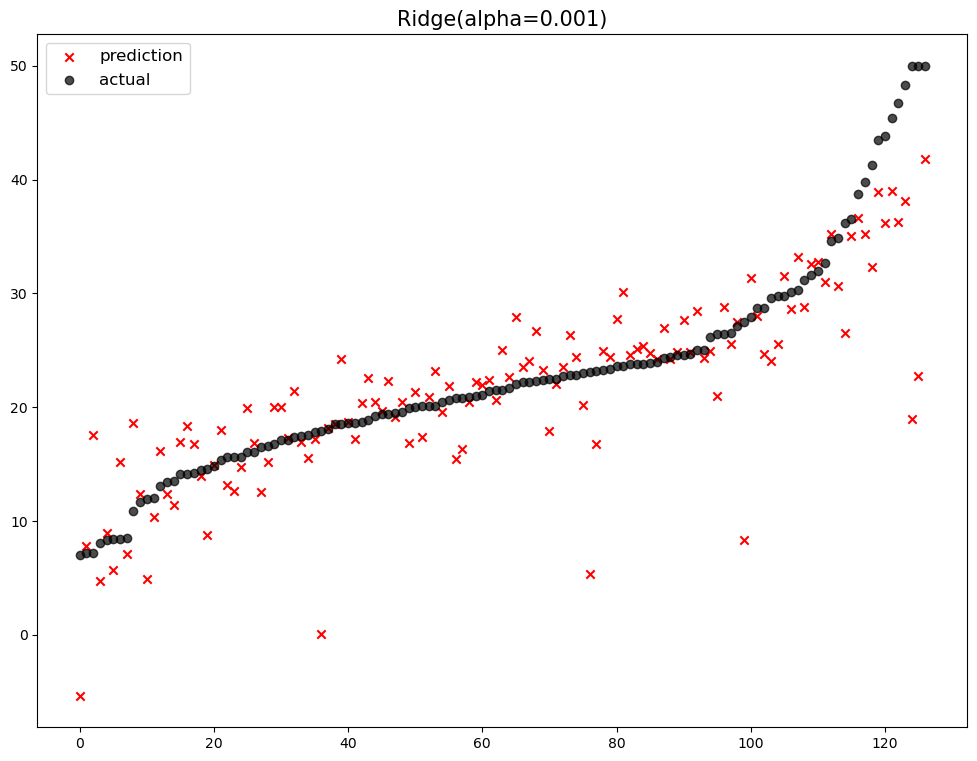

                model        mse
0      Ridge(alpha=1)  35.842039
1    Ridge(alpha=0.1)  35.396890
2   Ridge(alpha=0.01)  35.320994
3  Ridge(alpha=0.001)  35.313057
4    LinearRegression  35.312171
5     Ridge(alpha=10)  34.998585
6    Ridge(alpha=100)  31.088206


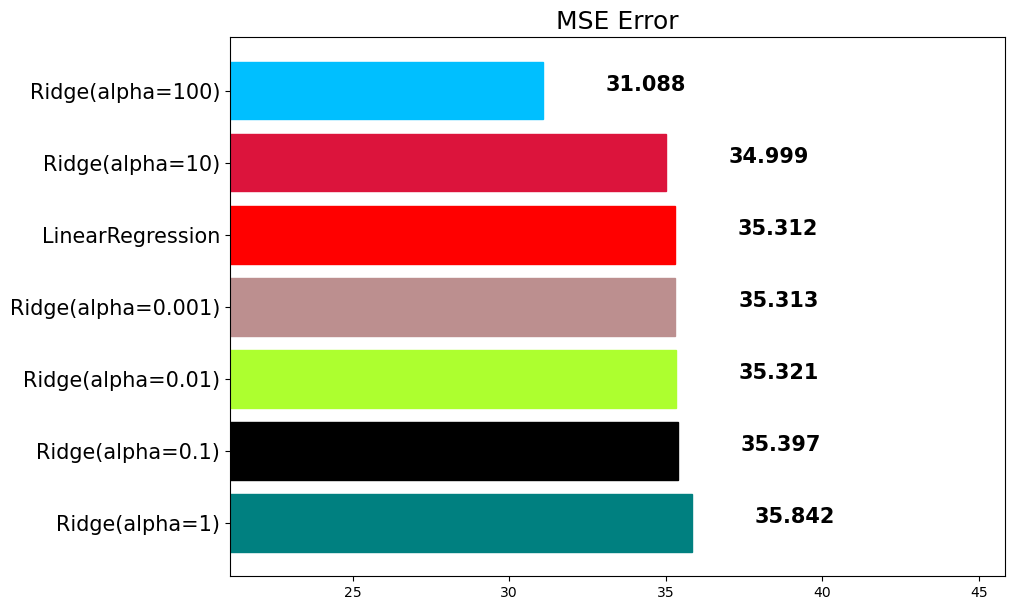

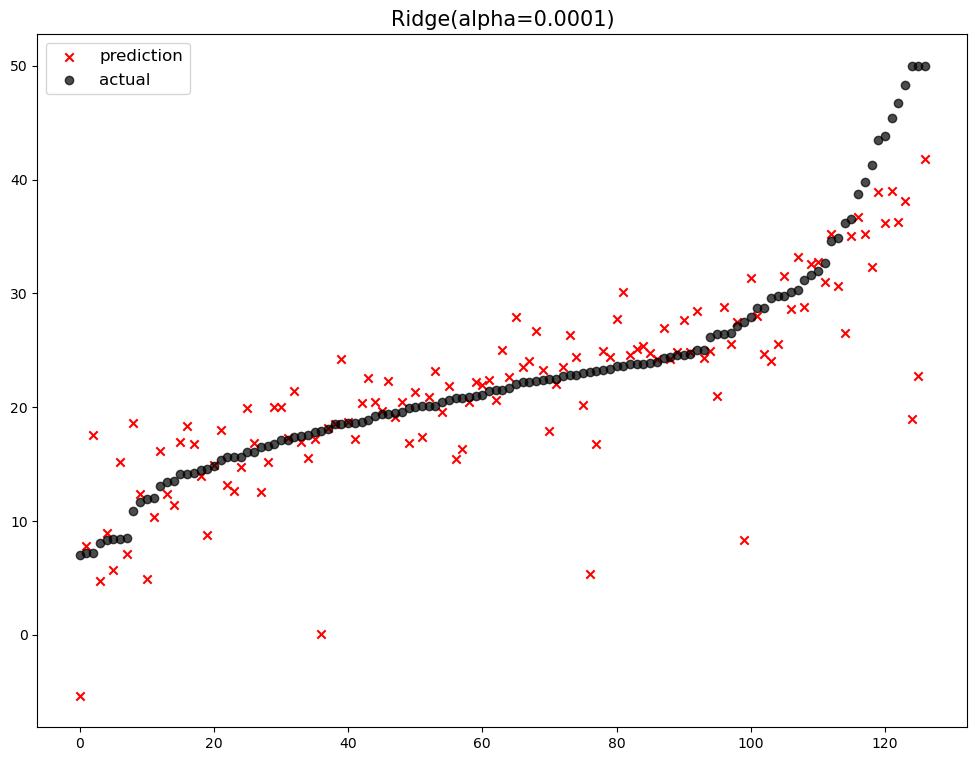

                 model        mse
0       Ridge(alpha=1)  35.842039
1     Ridge(alpha=0.1)  35.396890
2    Ridge(alpha=0.01)  35.320994
3   Ridge(alpha=0.001)  35.313057
4  Ridge(alpha=0.0001)  35.312259
5     LinearRegression  35.312171
6      Ridge(alpha=10)  34.998585
7     Ridge(alpha=100)  31.088206


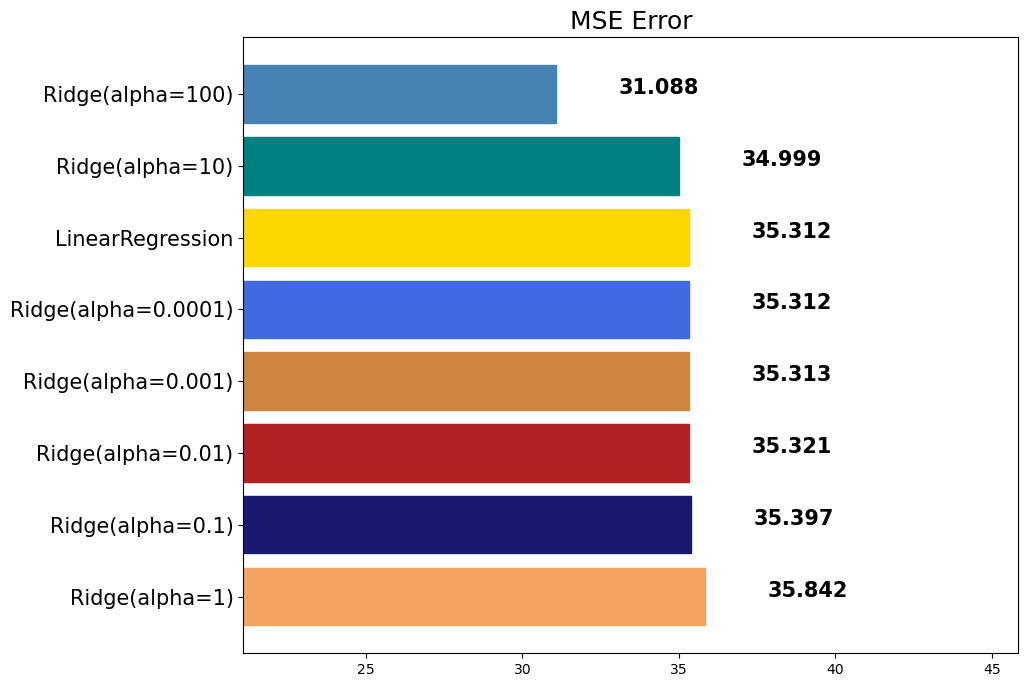

In [42]:
from sklearn.linear_model import Ridge

# 값이 커질 수록 큰 규제임
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha),pred, y_test)

In [111]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [112]:
ridge.coef_

array([ -0.10706707,   0.04114765,   0.0520595 ,   3.27202305,
       -15.51021254,   5.23890447,  -0.01473645,  -1.24913389,
         0.22265773,  -0.01117373,  -0.8555945 ,   0.01138187,
        -0.38360378])

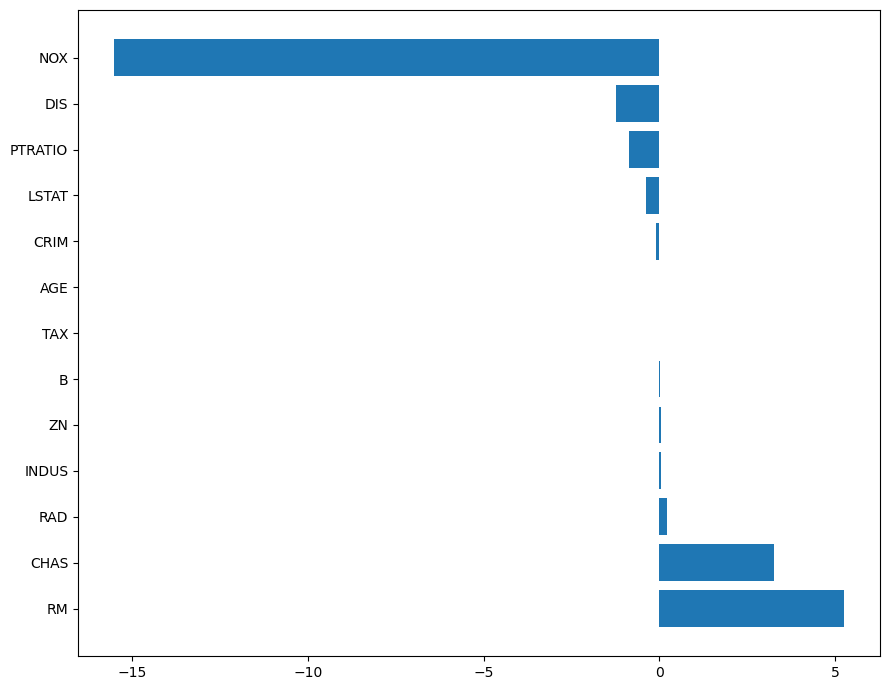

In [52]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns = ['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig,ax = plt.subplots(figsize=(9,7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()
    
plot_coef(x_train.columns, ridge.coef_)

- NOX가 가장 상관관계가 높음

In [113]:
## alpha값에 따른 coef의 차이 확인 

ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

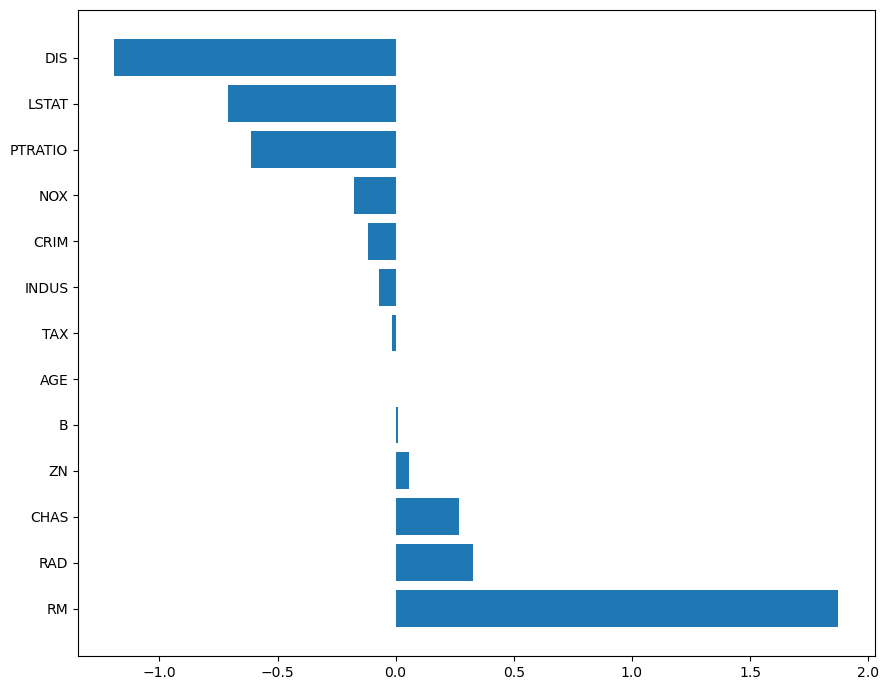

In [114]:
plot_coef(x_train.columns, ridge_100.coef_)

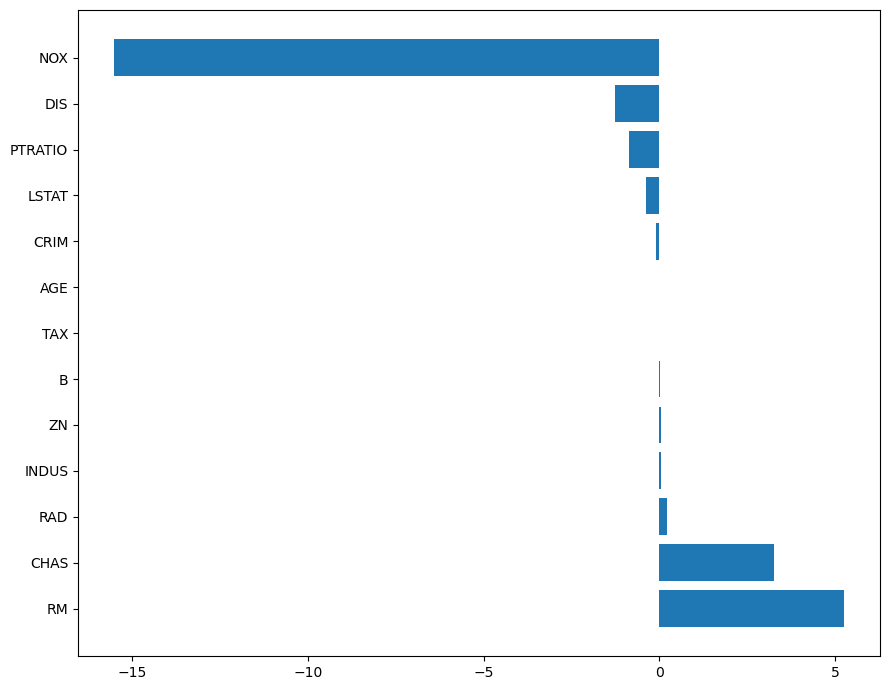

In [58]:
plot_coef(x_train.columns, ridge_001.coef_)

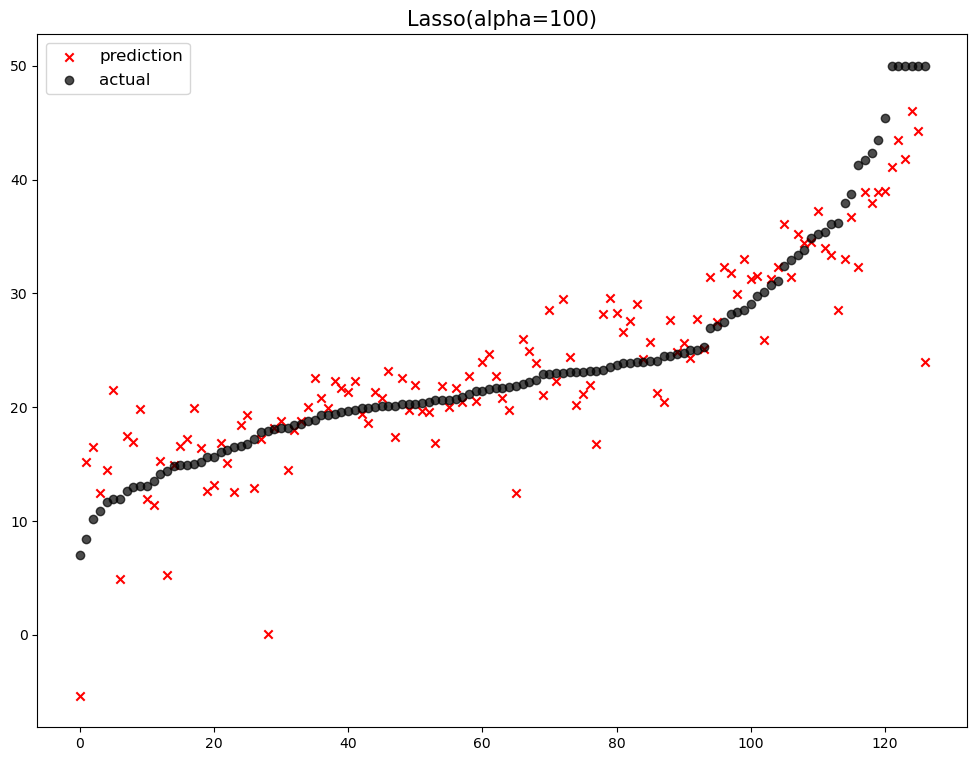

              model        mse
0  Lasso(alpha=100)  22.351181


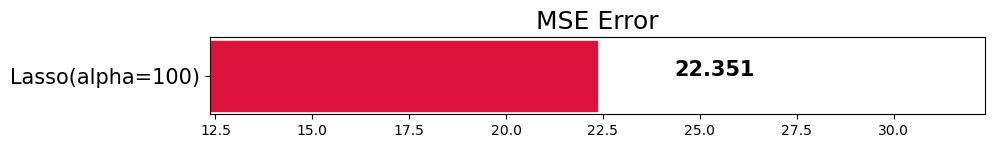

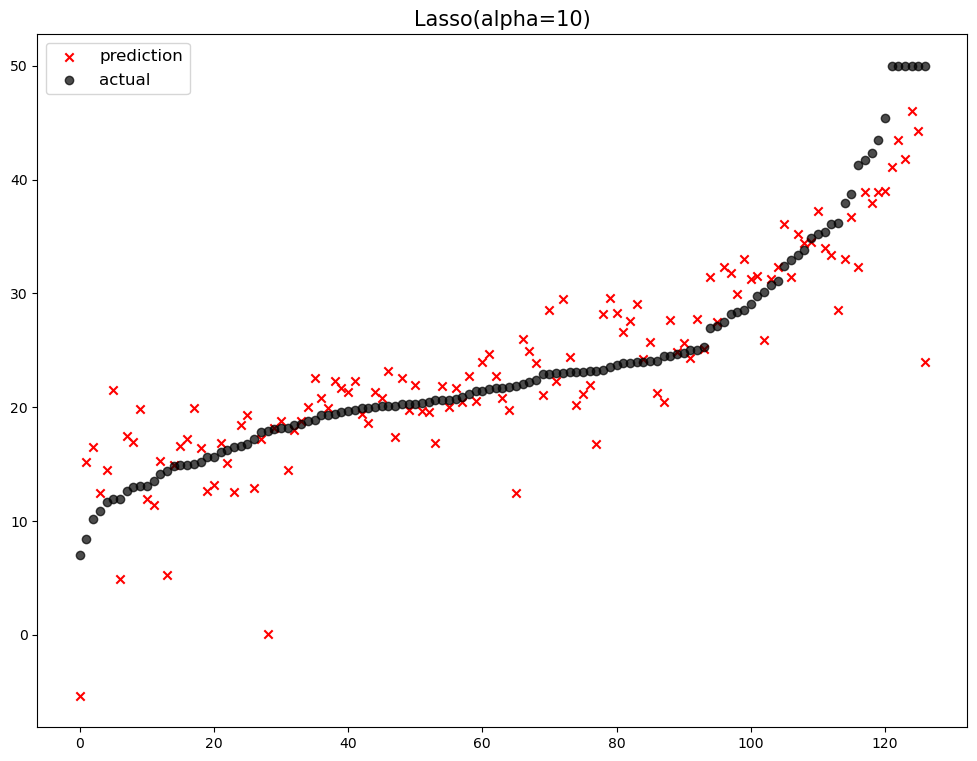

              model        mse
0  Lasso(alpha=100)  22.351181
1   Lasso(alpha=10)  22.351181


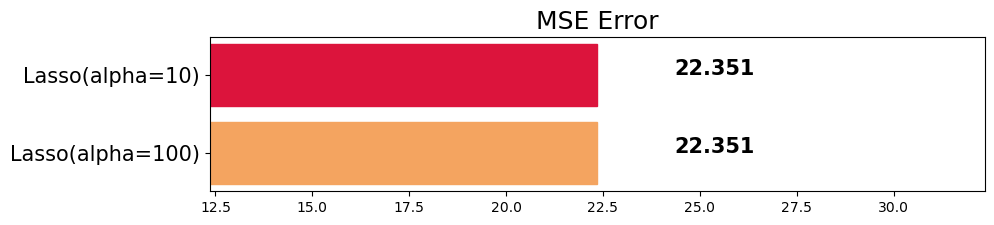

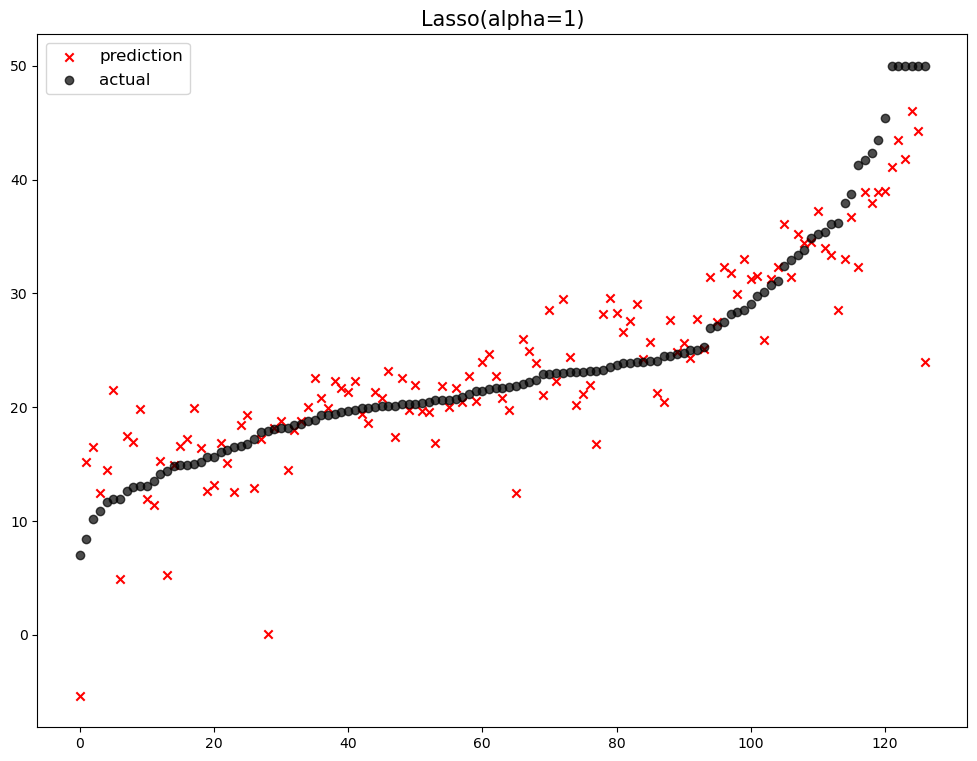

              model        mse
0  Lasso(alpha=100)  22.351181
1   Lasso(alpha=10)  22.351181
2    Lasso(alpha=1)  22.351181


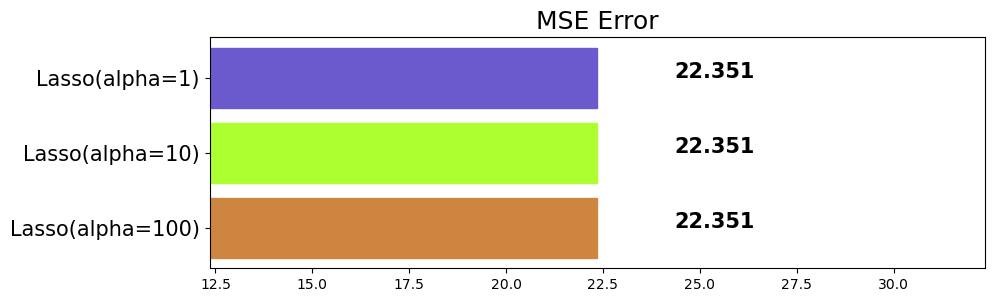

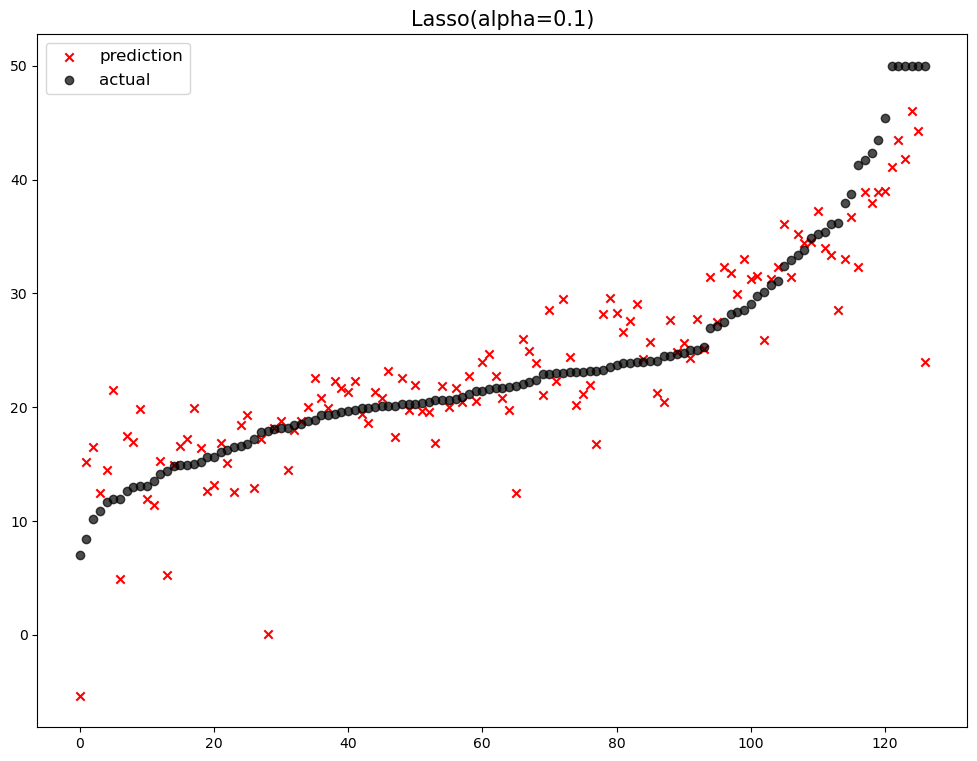

              model        mse
0  Lasso(alpha=100)  22.351181
1   Lasso(alpha=10)  22.351181
2    Lasso(alpha=1)  22.351181
3  Lasso(alpha=0.1)  22.351181


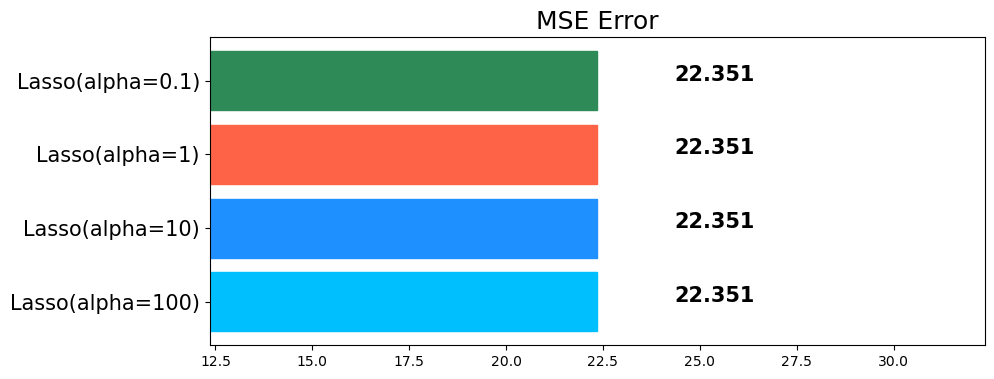

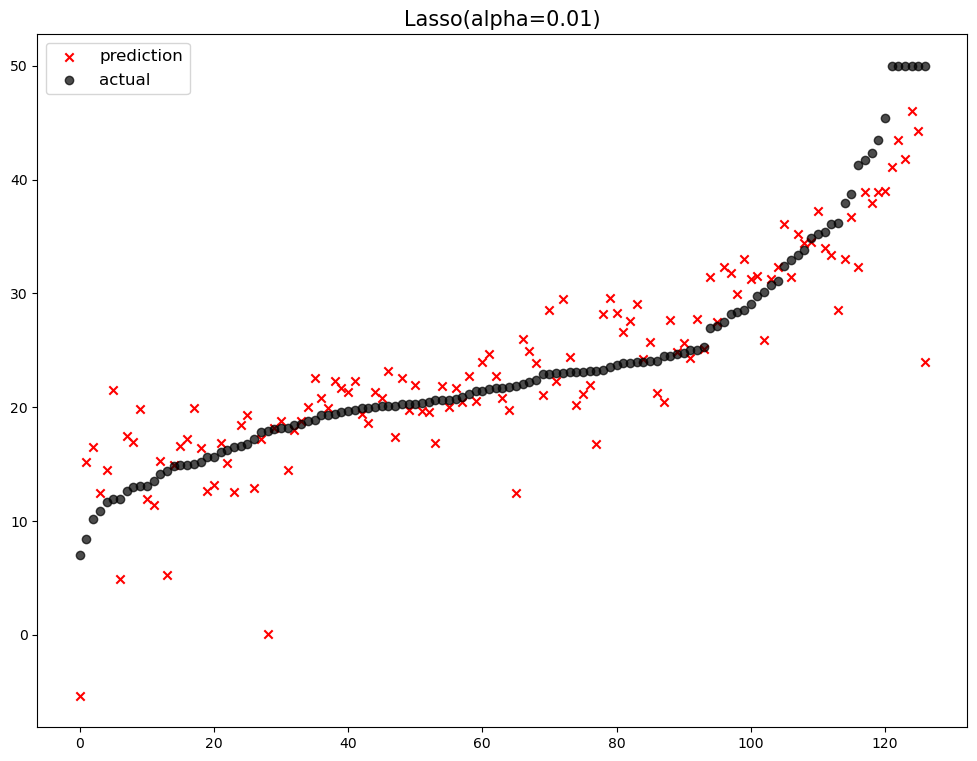

               model        mse
0   Lasso(alpha=100)  22.351181
1    Lasso(alpha=10)  22.351181
2     Lasso(alpha=1)  22.351181
3   Lasso(alpha=0.1)  22.351181
4  Lasso(alpha=0.01)  22.351181


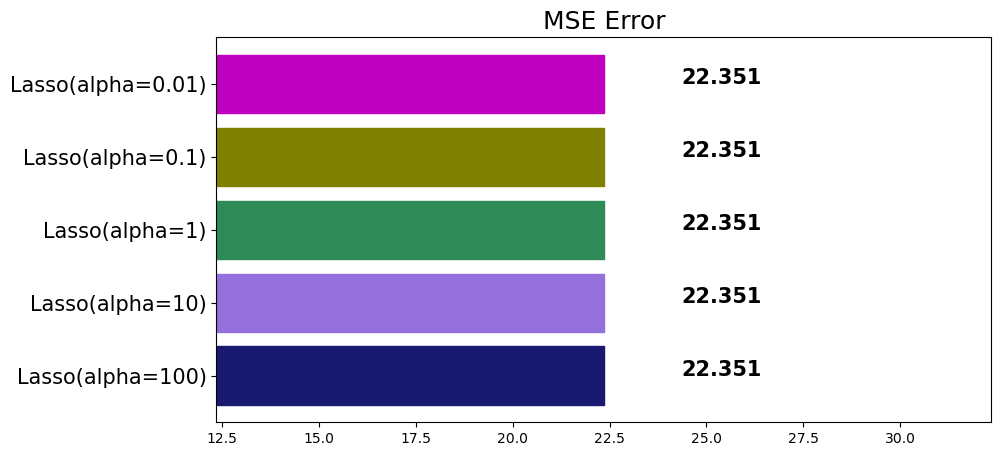

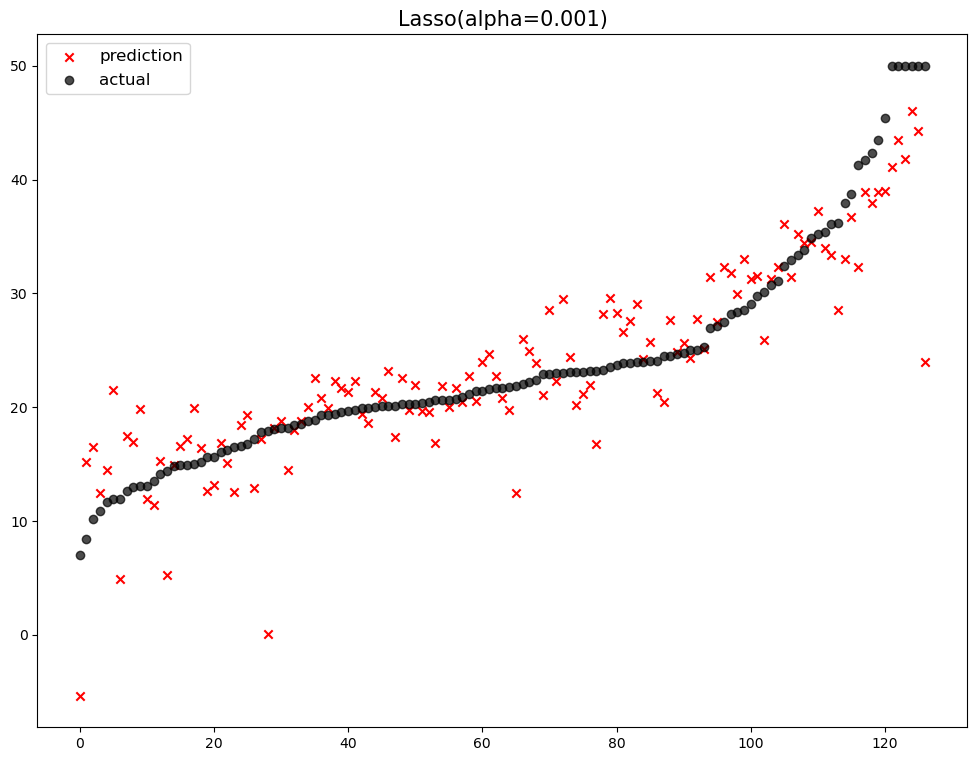

                model        mse
0    Lasso(alpha=100)  22.351181
1     Lasso(alpha=10)  22.351181
2      Lasso(alpha=1)  22.351181
3    Lasso(alpha=0.1)  22.351181
4   Lasso(alpha=0.01)  22.351181
5  Lasso(alpha=0.001)  22.351181


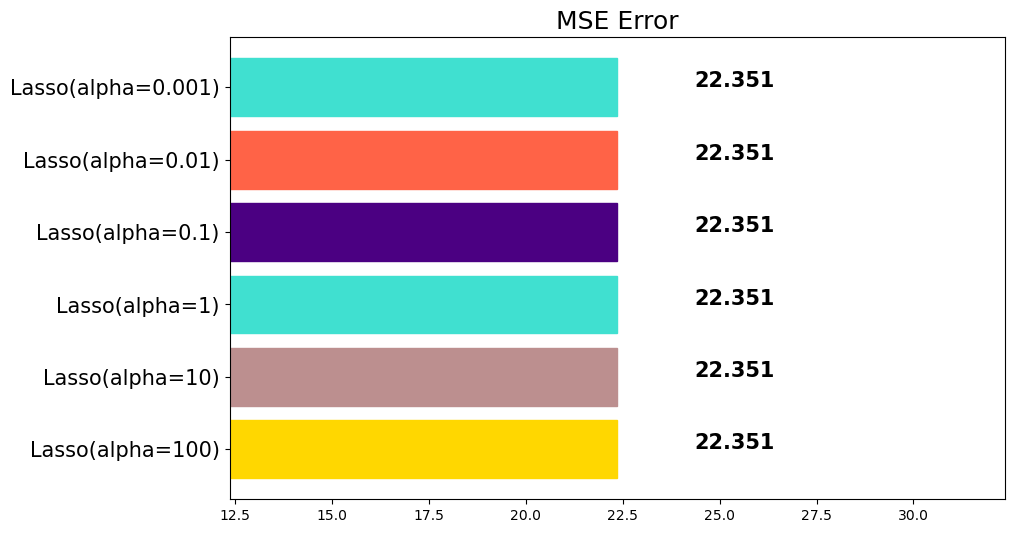

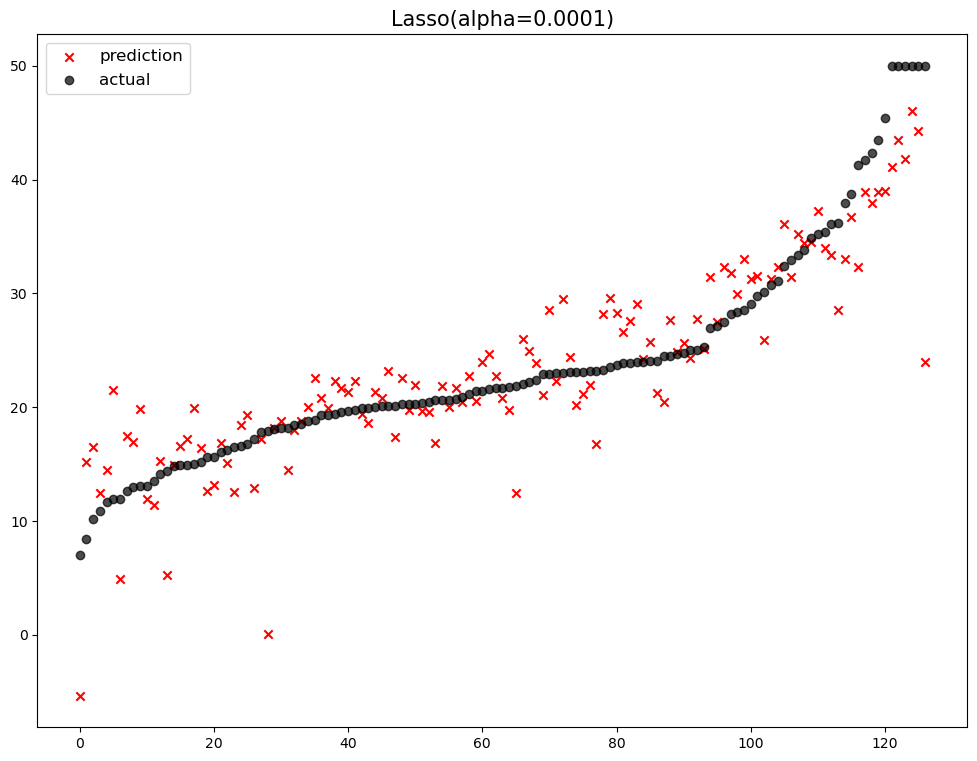

                 model        mse
0     Lasso(alpha=100)  22.351181
1      Lasso(alpha=10)  22.351181
2       Lasso(alpha=1)  22.351181
3     Lasso(alpha=0.1)  22.351181
4    Lasso(alpha=0.01)  22.351181
5   Lasso(alpha=0.001)  22.351181
6  Lasso(alpha=0.0001)  22.351181


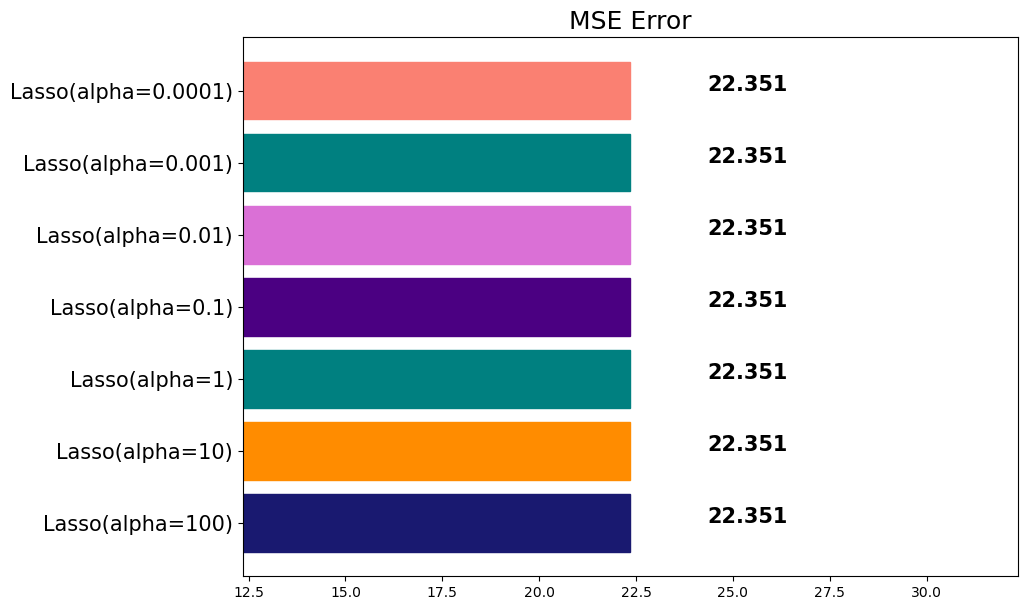

In [115]:
from sklearn.linear_model import Lasso


# 값이 커질 수록 큰 규제임
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha),pred, y_test)

In [62]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

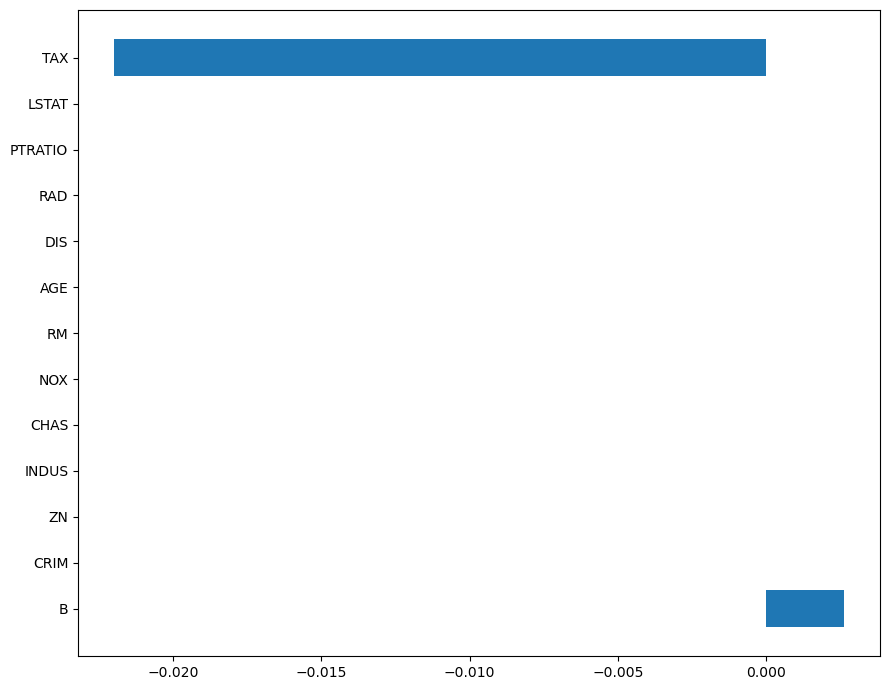

In [63]:
plot_coef(x_train.columns, lasso_100.coef_)

In [65]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02197425,
       -0.        ,  0.00261079, -0.        ])

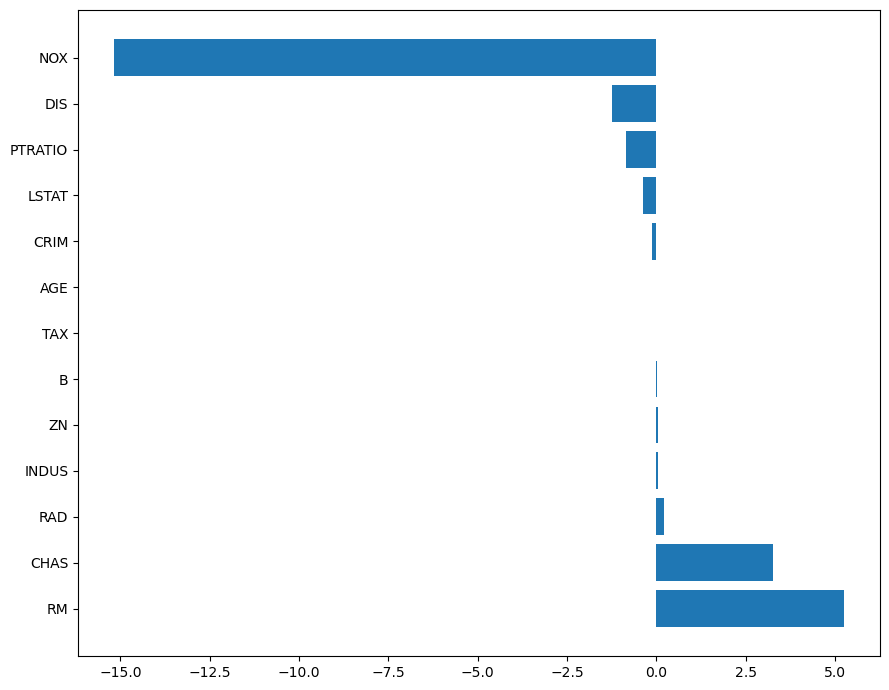

In [66]:
plot_coef(x_train.columns, lasso_001.coef_)

In [67]:
lasso_001.coef_

array([ -0.10689125,   0.04119452,   0.0508429 ,   3.2549238 ,
       -15.16683057,   5.24058059,  -0.01500009,  -1.24373428,
         0.22187791,  -0.01120185,  -0.85209768,   0.0114195 ,
        -0.38413777])

# ElasticNet

**l1_ratio (default=0.5)**

- l1_ratio = 0 (L2 규제만사용)
- l1_ratio = 1 (L1 규제만사용)
- 0 < l1_ratio <1 (L1, L2 규제의 혼합사용)

In [68]:
from sklearn.linear_model import ElasticNet

ratios=[0.2, 0.5, 0.8]

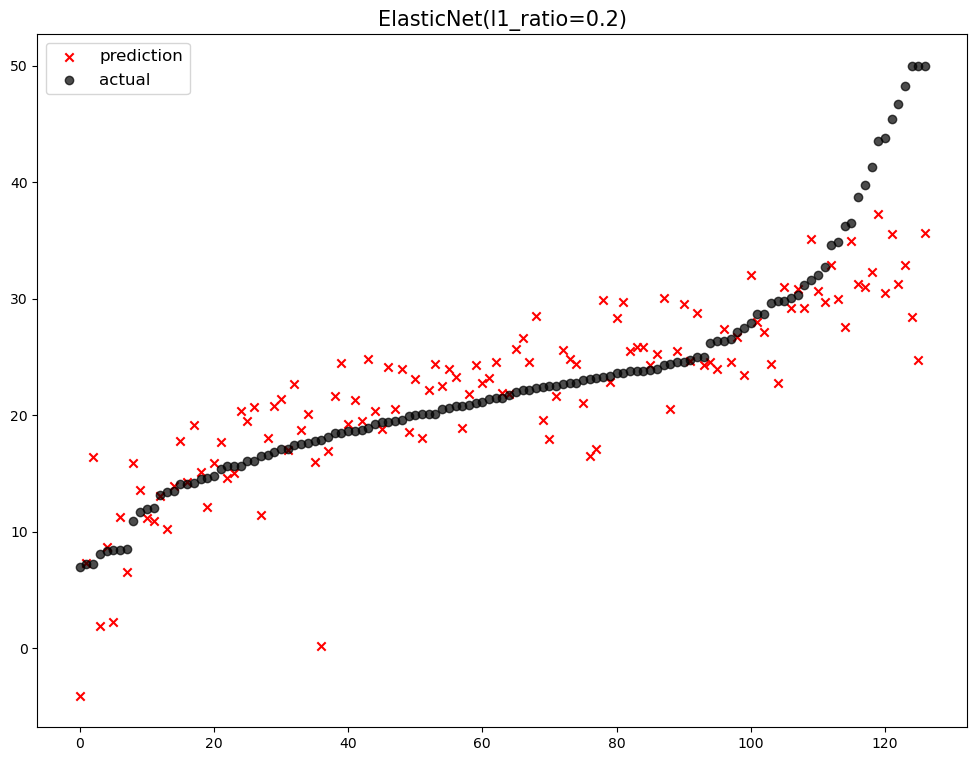

                       model        mse
0             Ridge(alpha=1)  35.842039
1           Ridge(alpha=0.1)  35.396890
2          Ridge(alpha=0.01)  35.320994
3         Ridge(alpha=0.001)  35.313057
4        Ridge(alpha=0.0001)  35.312259
5           Lasso(alpha=100)  35.312259
6            Lasso(alpha=10)  35.312259
7             Lasso(alpha=1)  35.312259
8           Lasso(alpha=0.1)  35.312259
9          Lasso(alpha=0.01)  35.312259
10        Lasso(alpha=0.001)  35.312259
11       Lasso(alpha=0.0001)  35.312259
12          LinearRegression  35.312171
13           Ridge(alpha=10)  34.998585
14  ElasticNet(l1_ratio=0.8)  32.274916
15  ElasticNet(l1_ratio=0.5)  32.132654
16  ElasticNet(l1_ratio=0.2)  32.019371
17          Ridge(alpha=100)  31.088206


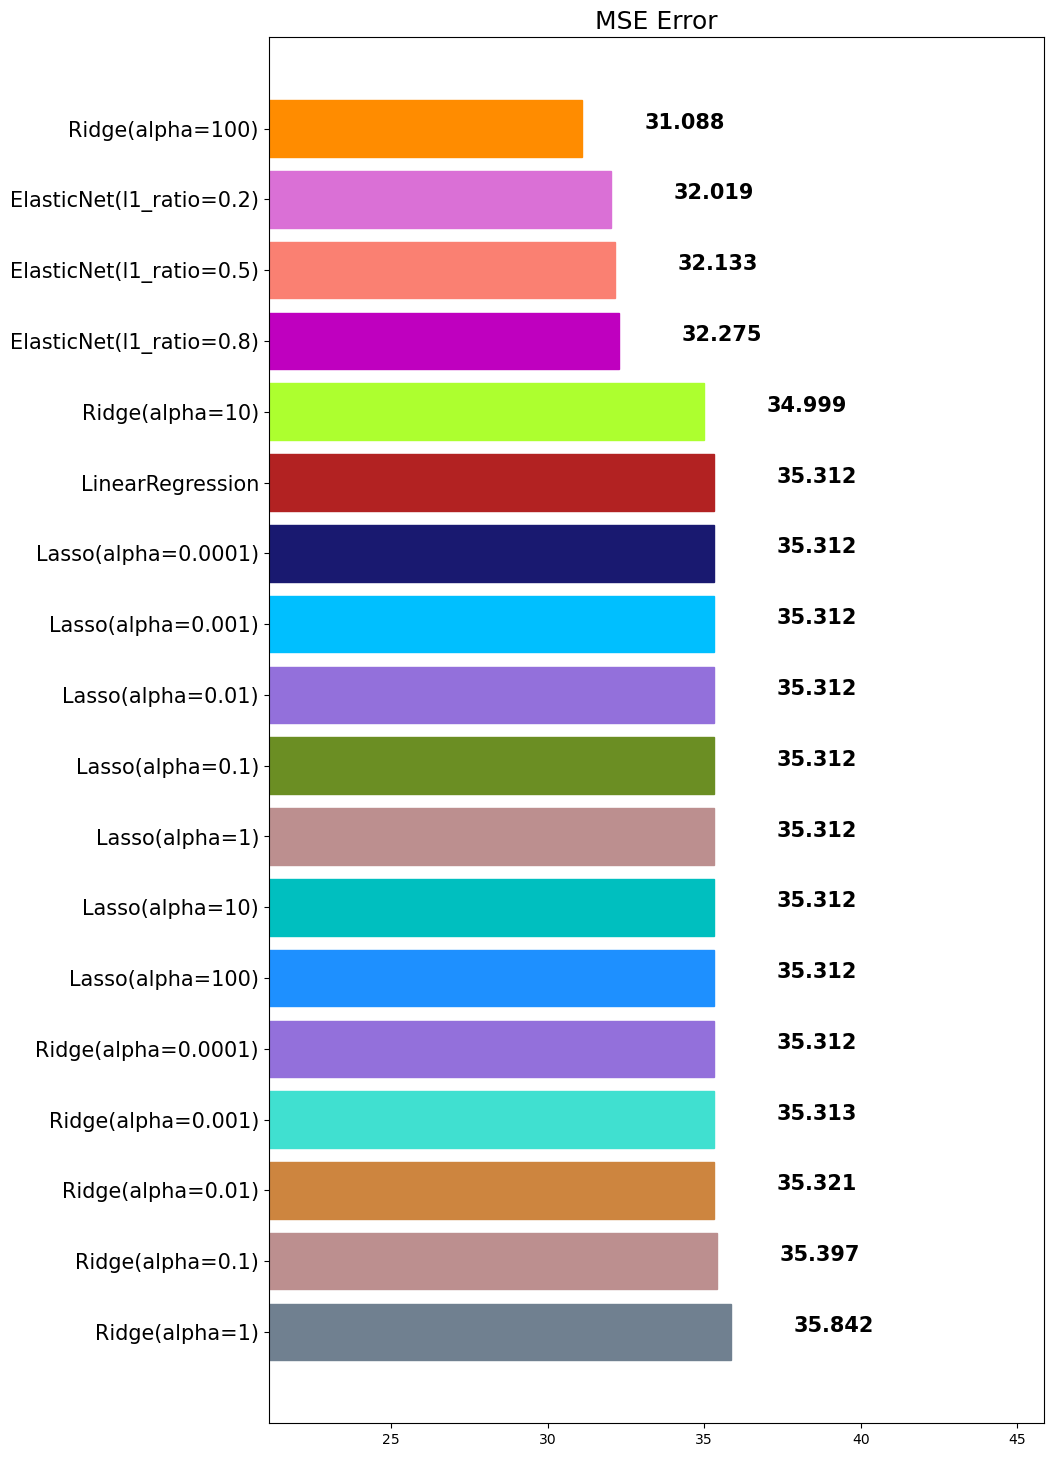

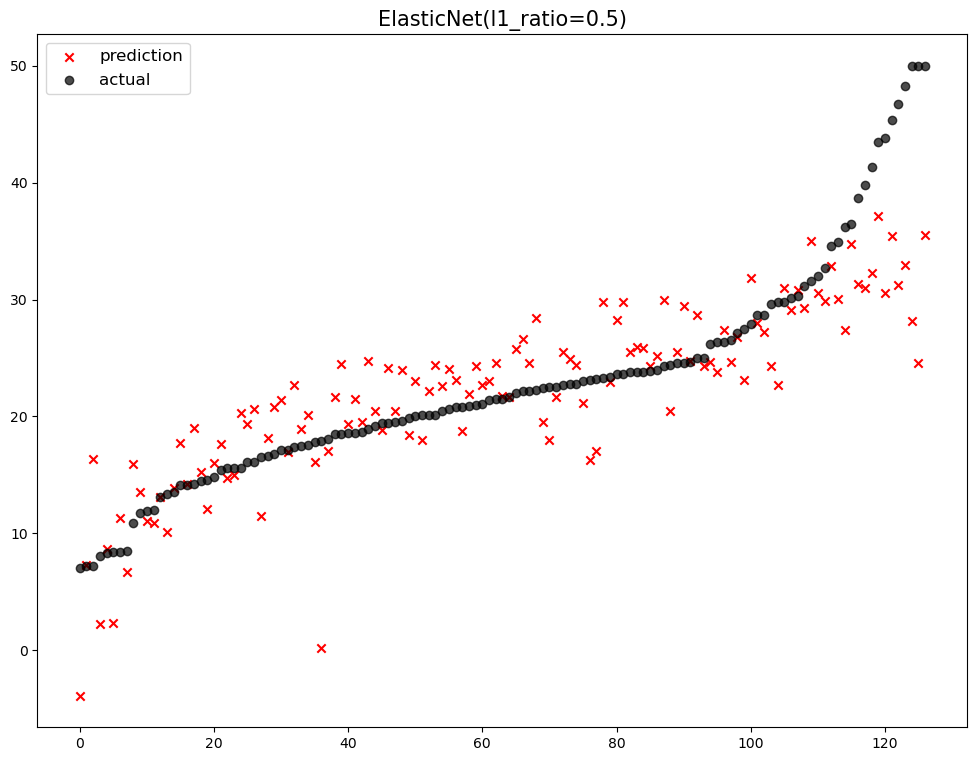

                       model        mse
0             Ridge(alpha=1)  35.842039
1           Ridge(alpha=0.1)  35.396890
2          Ridge(alpha=0.01)  35.320994
3         Ridge(alpha=0.001)  35.313057
4        Ridge(alpha=0.0001)  35.312259
5           Lasso(alpha=100)  35.312259
6            Lasso(alpha=10)  35.312259
7             Lasso(alpha=1)  35.312259
8           Lasso(alpha=0.1)  35.312259
9          Lasso(alpha=0.01)  35.312259
10        Lasso(alpha=0.001)  35.312259
11       Lasso(alpha=0.0001)  35.312259
12          LinearRegression  35.312171
13           Ridge(alpha=10)  34.998585
14  ElasticNet(l1_ratio=0.8)  32.274916
15  ElasticNet(l1_ratio=0.5)  32.132654
16  ElasticNet(l1_ratio=0.2)  32.019371
17          Ridge(alpha=100)  31.088206


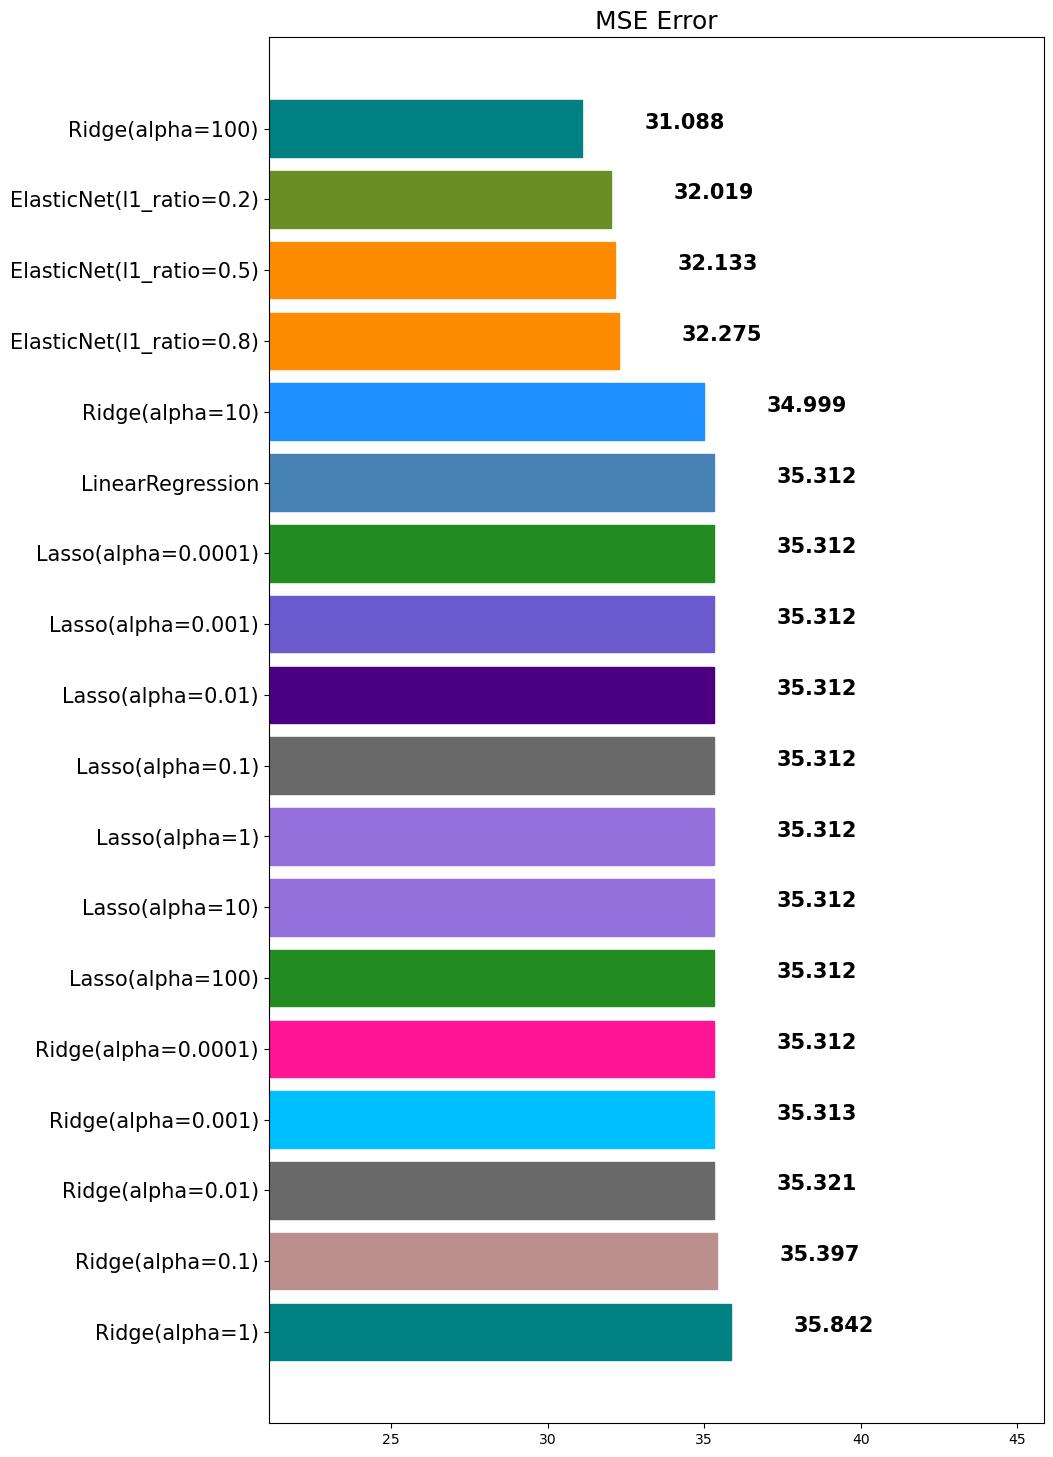

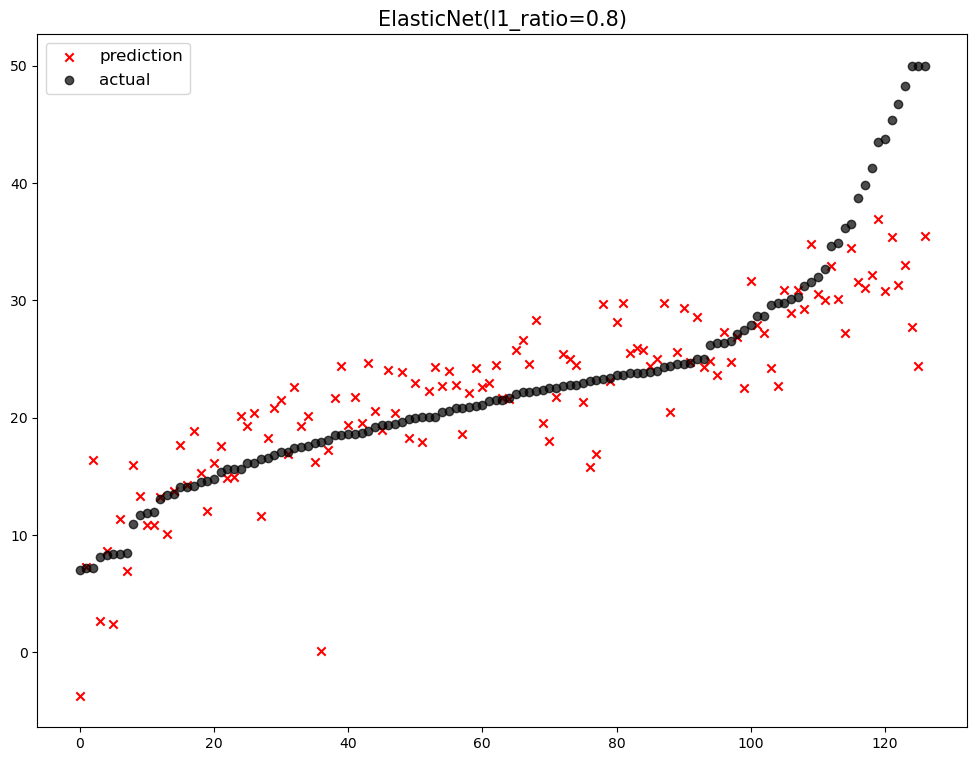

                       model        mse
0             Ridge(alpha=1)  35.842039
1           Ridge(alpha=0.1)  35.396890
2          Ridge(alpha=0.01)  35.320994
3         Ridge(alpha=0.001)  35.313057
4        Ridge(alpha=0.0001)  35.312259
5           Lasso(alpha=100)  35.312259
6            Lasso(alpha=10)  35.312259
7             Lasso(alpha=1)  35.312259
8           Lasso(alpha=0.1)  35.312259
9          Lasso(alpha=0.01)  35.312259
10        Lasso(alpha=0.001)  35.312259
11       Lasso(alpha=0.0001)  35.312259
12          LinearRegression  35.312171
13           Ridge(alpha=10)  34.998585
14  ElasticNet(l1_ratio=0.8)  32.274916
15  ElasticNet(l1_ratio=0.5)  32.132654
16  ElasticNet(l1_ratio=0.2)  32.019371
17          Ridge(alpha=100)  31.088206


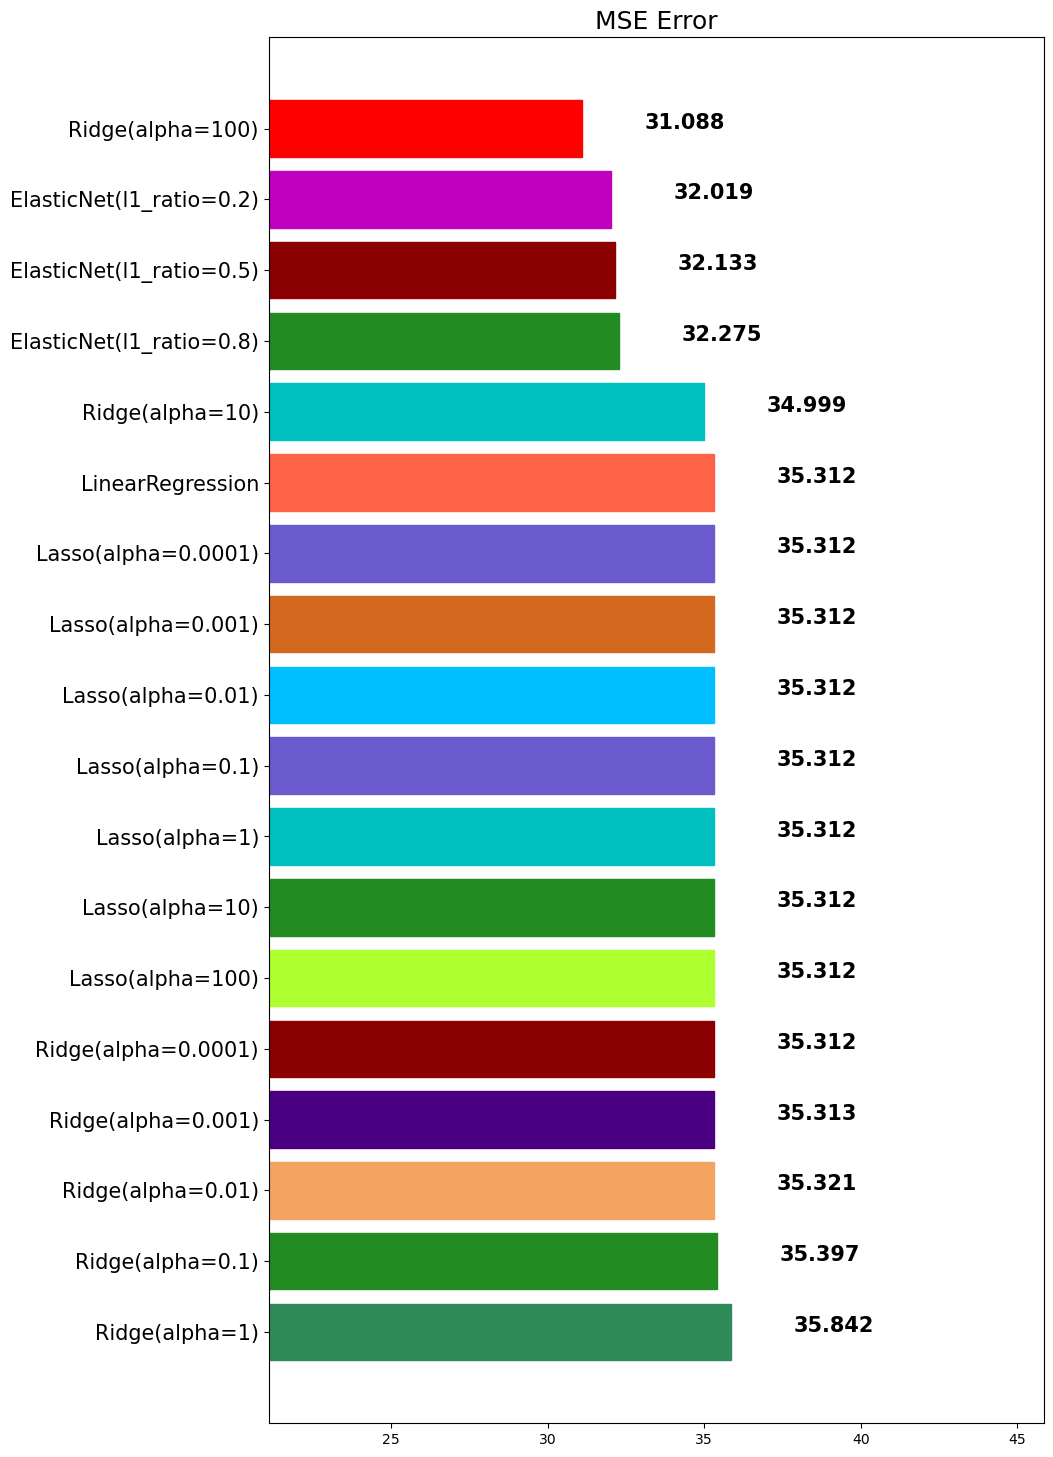

In [71]:
for ratio in ratios:
    elasticnet = ElasticNet(l1_ratio = ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio),pred, y_test)    

In [73]:
elasticnet_20 = ElasticNet(alpha=0.2)
elasticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elasticnet_20.predict(x_test)

elasticnet_80 = ElasticNet(alpha=0.8)
elasticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elasticnet_80.predict(x_test)

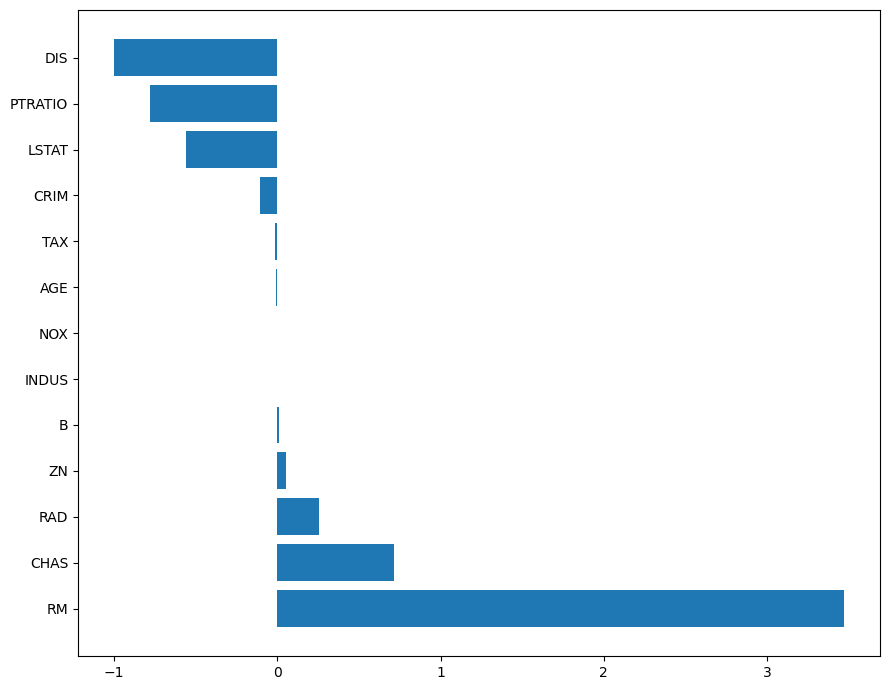

In [75]:
plot_coef(x_train.columns, elasticnet_20.coef_)

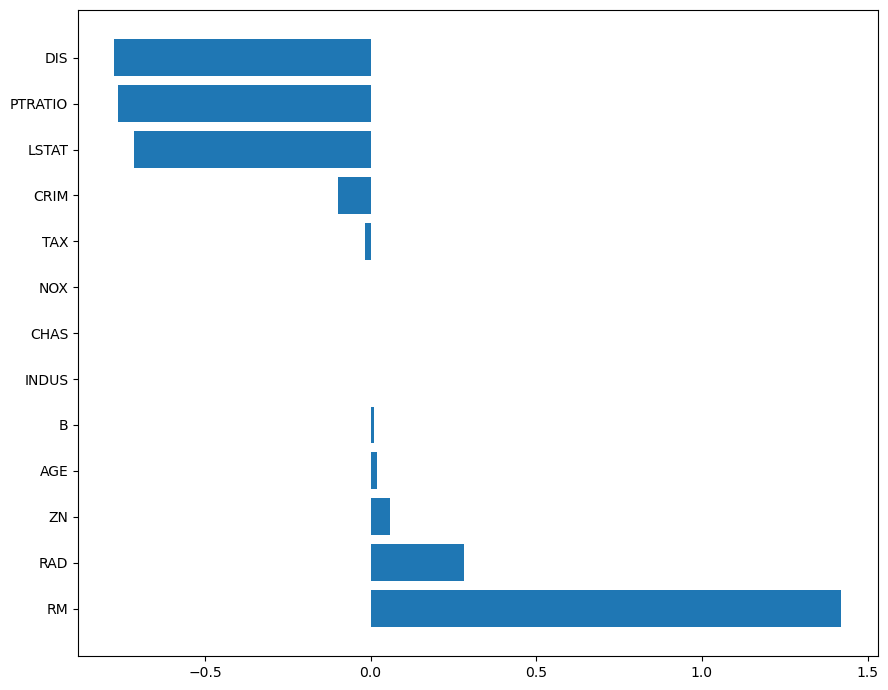

In [76]:
plot_coef(x_train.columns, elasticnet_80.coef_)

In [77]:
 elasticnet_80.coef_

array([-0.09760107,  0.05812833,  0.        ,  0.        , -0.        ,
        1.42113304,  0.01876151, -0.77363089,  0.28226336, -0.01625179,
       -0.7626002 ,  0.00997096, -0.71362219])

# Scaler

In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [80]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.624986,11.911609,11.055515,0.081794,0.553641,6.311892,67.782058,3.847408,9.538259,407.269129,18.494987,359.469657,12.571372
std,9.026646,23.909734,6.854522,0.274413,0.115530,0.682559,28.501596,2.117958,8.725411,169.602917,2.152027,87.575470,7.118133
min,0.006320,0.000000,0.460000,0.000000,0.389000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.079230,0.000000,5.190000,0.000000,0.448000,5.890000,42.250000,2.111000,4.000000,277.000000,17.400000,376.355000,6.735000
50%,0.253870,0.000000,8.560000,0.000000,0.538000,6.209000,77.000000,3.317500,5.000000,330.000000,19.100000,392.040000,11.320000
75%,3.621175,17.750000,18.100000,0.000000,0.624000,6.635000,93.700000,5.237900,24.000000,666.000000,20.200000,396.350000,17.105000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# StandardScaler
- 평균(mean)=0, 표준편차(std)=1로 만들어주는 스케일러 

In [82]:
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(x_train)
round(pd.DataFrame(std_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-0.50,-1.55,-0.30,-1.43,-3.19,-2.28,-1.28,-0.98,-1.30,-2.74,-4.11,-1.53
25%,-0.39,-0.50,-0.86,-0.30,-0.92,-0.62,-0.90,-0.82,-0.64,-0.77,-0.51,0.19,-0.82
50%,-0.37,-0.50,-0.36,-0.30,-0.14,-0.15,0.32,-0.25,-0.52,-0.46,0.28,0.37,-0.18
75%,-0.00,0.24,1.03,-0.30,0.61,0.47,0.91,0.66,1.66,1.53,0.79,0.42,0.64
max,9.47,3.48,2.44,3.35,2.75,3.62,1.13,3.91,1.66,1.79,1.63,0.43,3.57


# MinMaxScaler
- min값과 max값을 0~1 사이로 정규화

In [83]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [87]:
round(pd.DataFrame(minmax_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.13,0.39,0.08,0.34,0.47,0.67,0.25,0.37,0.42,0.63,0.91,0.30
std,0.10,0.25,0.25,0.27,0.24,0.15,0.29,0.19,0.38,0.32,0.23,0.22,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.12,0.38,0.41,0.09,0.13,0.17,0.51,0.95,0.14
50%,0.00,0.00,0.30,0.00,0.31,0.45,0.76,0.20,0.17,0.27,0.69,0.99,0.26
75%,0.04,0.19,0.65,0.00,0.49,0.54,0.94,0.37,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# RobustScaler
- 중앙값(median)=0, IQR=1이 되도록 변환
- IQR : interquartile range

#### outlier 값 처리에 유용

In [89]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [90]:
round(pd.DataFrame(robust_scaled).median(),2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

# 파이프라인

In [92]:
from sklearn.pipeline import make_pipeline

elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2))

elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

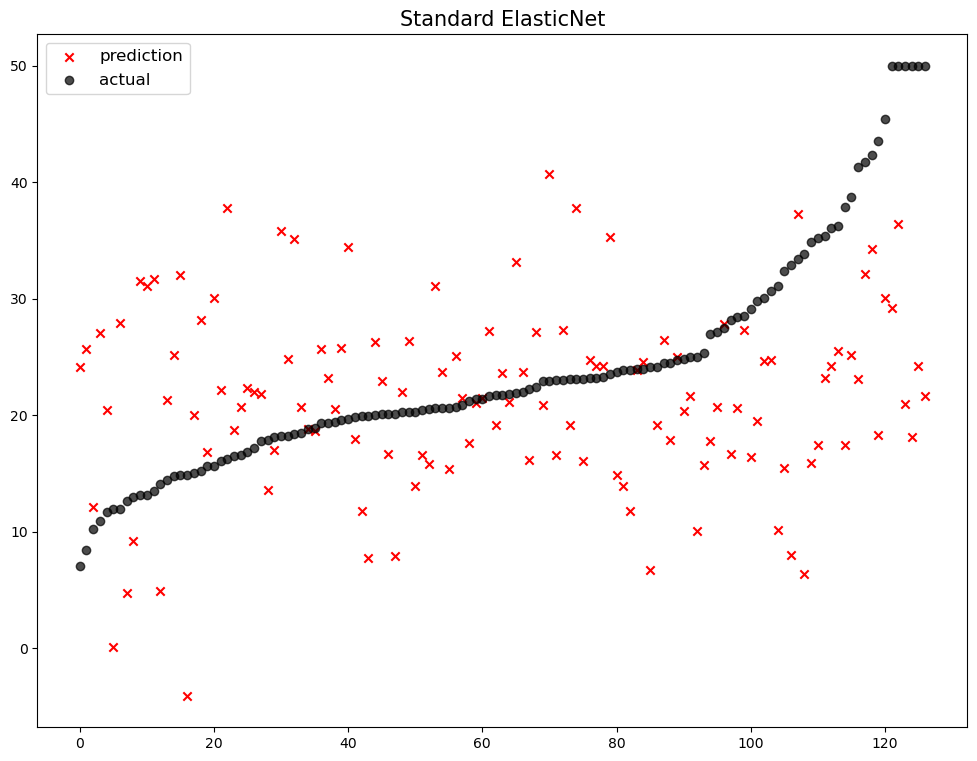

                 model         mse
0  Standard ElasticNet  140.429572
1     Lasso(alpha=100)   22.351181
2      Lasso(alpha=10)   22.351181
3       Lasso(alpha=1)   22.351181
4     Lasso(alpha=0.1)   22.351181
5    Lasso(alpha=0.01)   22.351181
6   Lasso(alpha=0.001)   22.351181
7  Lasso(alpha=0.0001)   22.351181


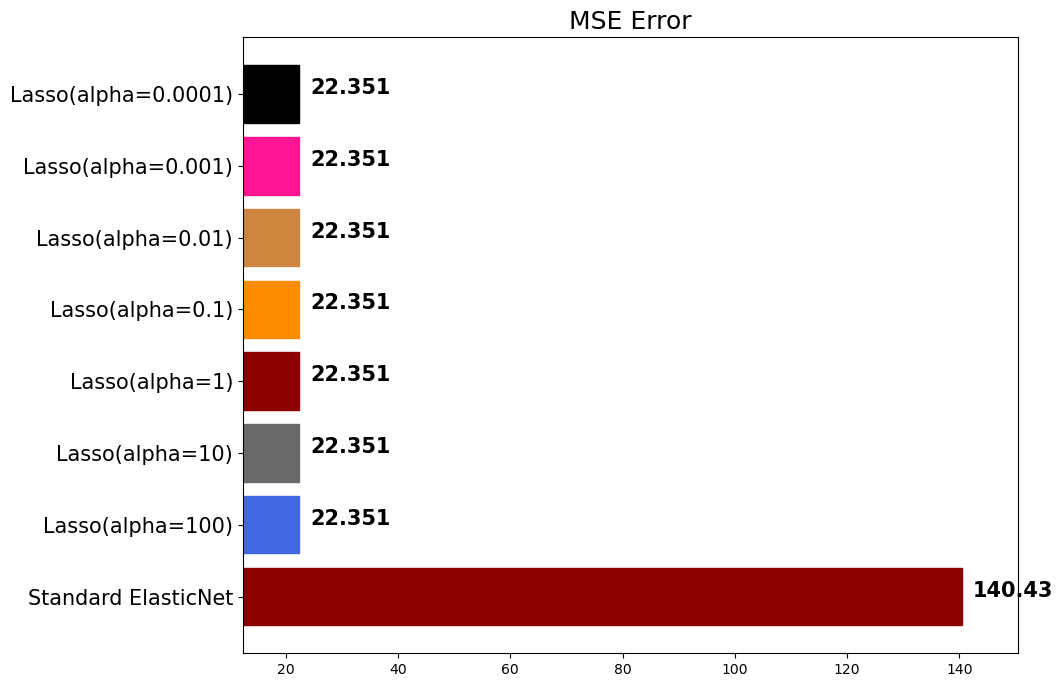

In [117]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

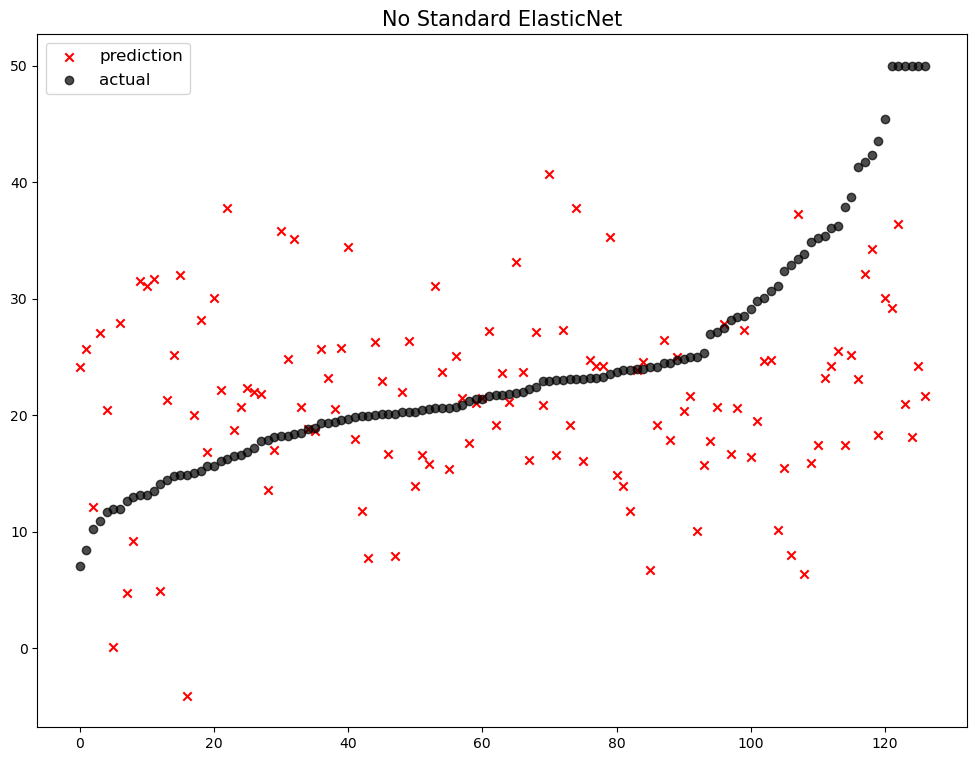

                    model         mse
0     Standard ElasticNet  140.429572
1  No Standard ElasticNet  140.429572
2        Lasso(alpha=100)   22.351181
3         Lasso(alpha=10)   22.351181
4          Lasso(alpha=1)   22.351181
5        Lasso(alpha=0.1)   22.351181
6       Lasso(alpha=0.01)   22.351181
7      Lasso(alpha=0.001)   22.351181
8     Lasso(alpha=0.0001)   22.351181


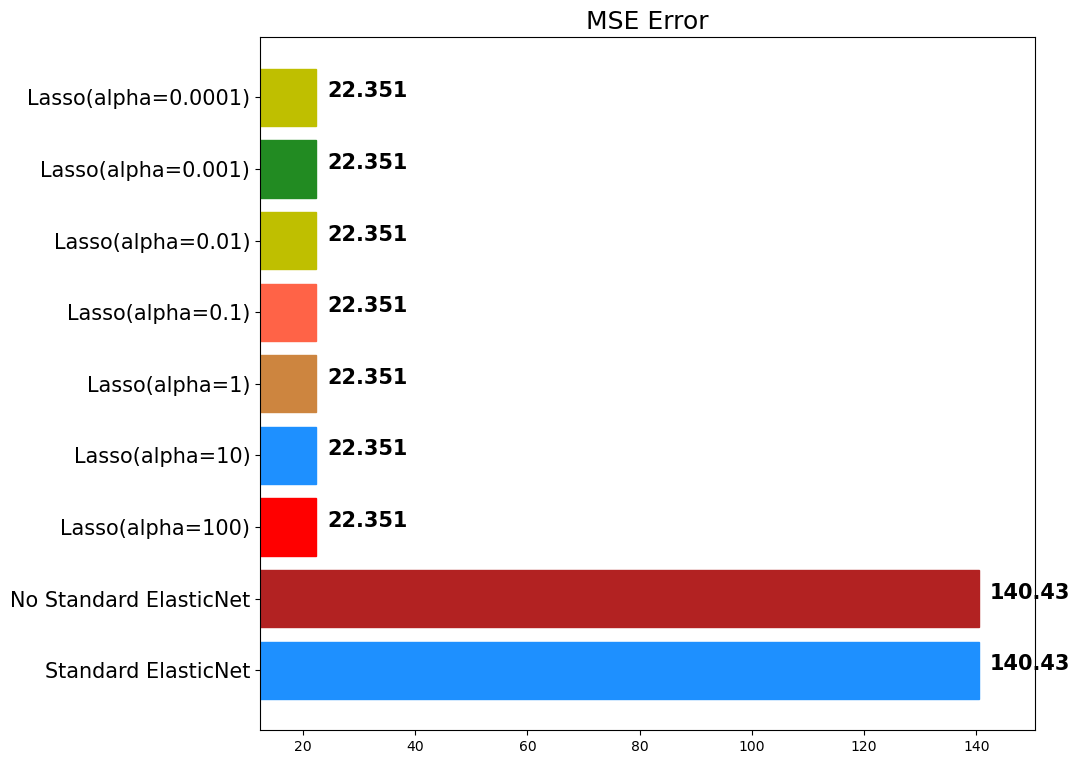

In [119]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1,l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)

mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

# Polynomial Features

다항식 계수간 상호작용을 통해 **새로운 feature를 생성**함.

예를 들면 [a,b] 2개의 feature가 존재한다고 가정하고

degree=2로 설정한다면  Polynomial Features는 [1, a, b, a^2, b^2]가 생성됨.

In [121]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_train)[0]
poly_features

array([     0.14866   ,      0.        ,      8.56      ,      0.        ,
            0.52      ,      6.727     ,     79.9       ,      2.7778    ,
            5.        ,    384.        ,     20.9       ,    394.76      ,
            9.42      ,      0.0220998 ,      0.        ,      1.2725296 ,
            0.        ,      0.0773032 ,      1.00003582,     11.877934  ,
            0.41294775,      0.7433    ,     57.08544   ,      3.106994  ,
           58.6850216 ,      1.4003772 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,     73.2736    ,      0.        ,
            4.4512    ,     57.58312   ,    683.944     ,     23.777968  ,
           42.8       ,   3287.04      ,    178.904     ,   3379.1456    ,
           80.6352    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [122]:
x_train.iloc[0]

CRIM         0.14866
ZN           0.00000
INDUS        8.56000
CHAS         0.00000
NOX          0.52000
RM           6.72700
AGE         79.90000
DIS          2.77780
RAD          5.00000
TAX        384.00000
PTRATIO     20.90000
B          394.76000
LSTAT        9.42000
Name: 100, dtype: float64

In [123]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2))

In [124]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

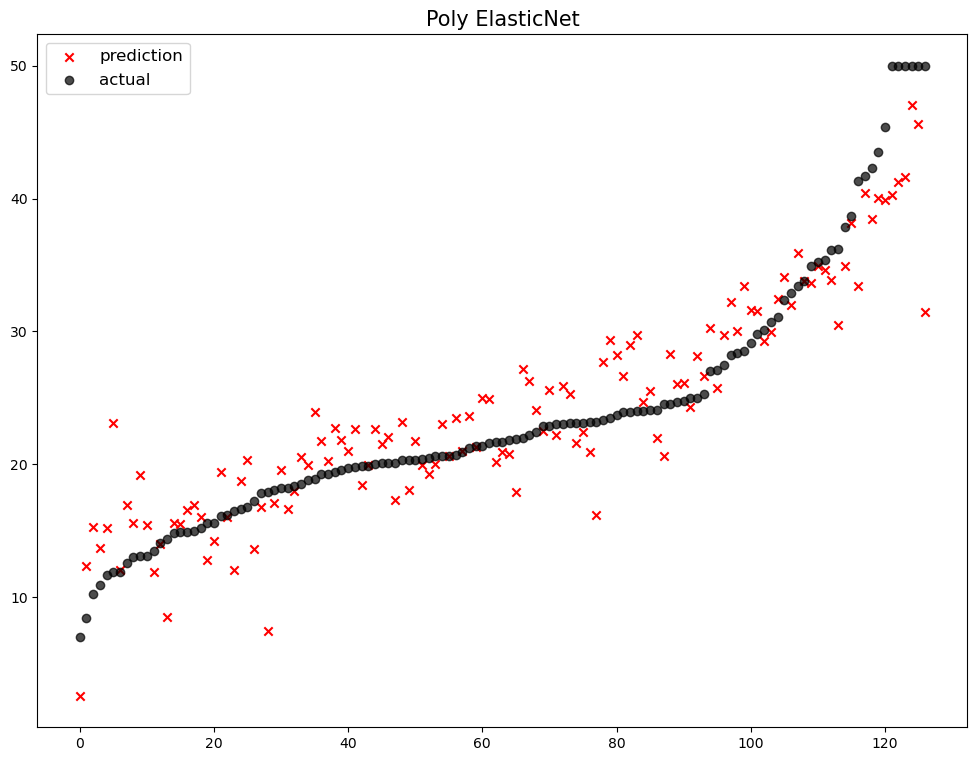

                    model         mse
0     Standard ElasticNet  140.429572
1  No Standard ElasticNet  140.429572
2        Lasso(alpha=100)   22.351181
3         Lasso(alpha=10)   22.351181
4          Lasso(alpha=1)   22.351181
5        Lasso(alpha=0.1)   22.351181
6       Lasso(alpha=0.01)   22.351181
7      Lasso(alpha=0.001)   22.351181
8     Lasso(alpha=0.0001)   22.351181
9         Poly ElasticNet   14.616208


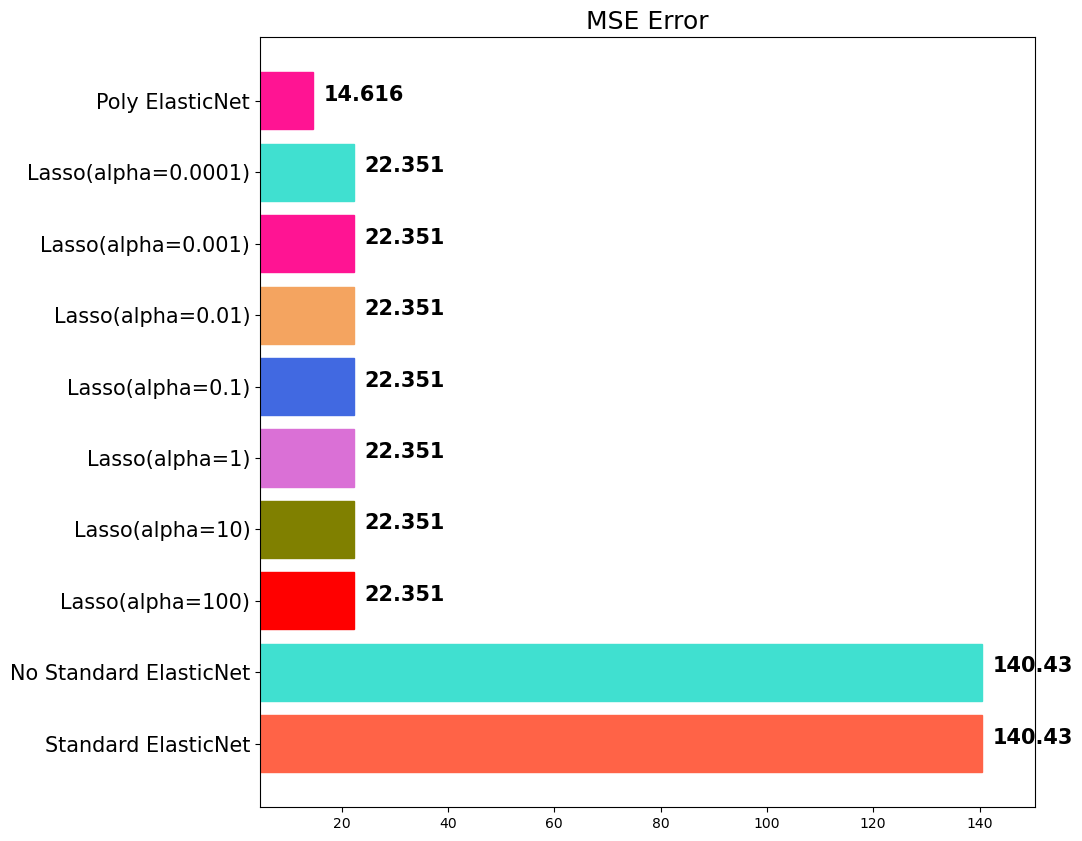

In [125]:
mse_eval('Poly ElasticNet', poly_pred, y_test)